总交易数 = 815,640  | 欺诈数 = 4,136  | 欺诈占比 = 0.507086%

【金额描述性统计（所有欺诈样本）】
count    4136.000000
mean      703.328627
std      1898.213240
min     -2999.040000
1%      -2922.707500
5%      -2591.357500
10%     -2198.285000
25%       315.842500
50%       714.945000
75%      1693.332500
90%      3331.760000
95%      4176.437500
99%      4829.652000
max      4998.420000

【细分位数】
 quantile      amount
   0.0000 -2,999.0400
   0.0010 -2,984.6130
   0.0100 -2,922.7075
   0.0500 -2,591.3575
   0.1000 -2,198.2850
   0.2500    315.8425
   0.5000    714.9450
   0.7500  1,693.3325
   0.9000  3,331.7600
   0.9500  4,176.4375
   0.9900  4,829.6520
   0.9990  4,982.3831
   1.0000  4,998.4200

【金额符号占比】正数: 75.85% | 负数: 24.15% | 0: 0.00%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


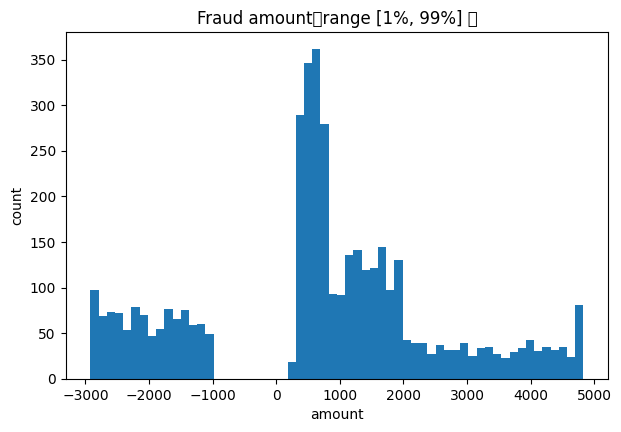

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


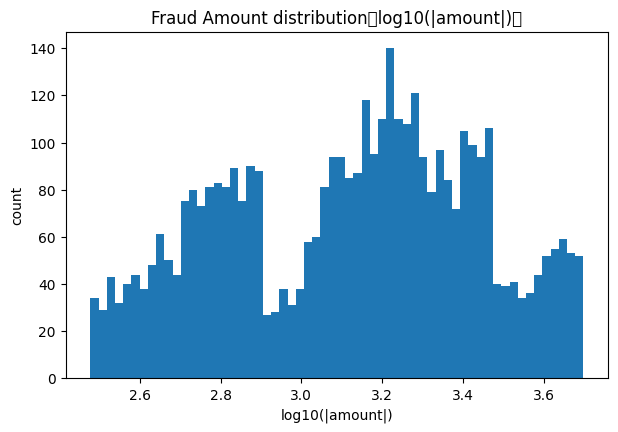


【Top-20 绝对金额最大欺诈】
                      transaction_id                           account_id transaction_date  amount currency        category
e5b33e3a-4994-443c-b705-d1eb45724c03 7c00a0a5-b230-427f-800d-4d60a871eec9       2023-11-18 4998.42      USD Online Shopping
4072e71b-c52f-4305-a5db-e8844313efa8 f6168c0d-5e9c-4c6a-9eab-9824b7e7de07       2025-07-12 4994.03      USD Online Shopping
63d68151-51f2-4566-8728-460340a00206 504d827c-93da-452c-8821-4dd8da92b355       2025-04-12 4992.97      USD Online Shopping
1458efce-7507-4da4-8d23-e3d1745b2fc8 9be63f91-6591-4904-8f98-f48351ca10d3       2025-01-16 4985.60      USD Online Shopping
ef0c5515-ab44-4a33-8e82-40b8f0b5893d 6b37a3aa-314a-4bef-bbf0-eedaf890c3c1       2024-10-09 4982.73      USD Online Shopping
0095cdd1-6b2c-46d4-af41-7cce4cafe723 b546dc69-7539-4fed-b7d3-9cd71bc2a40e       2025-06-13 4980.16      USD Online Shopping
ca563015-d7a8-4520-96f0-9edfae9a564e fa779d00-2ec4-49de-a381-b9ab227affa3       2025-04-12 4973.83      USD Onlin

In [ ]:
# === Fraud 交易金额分布体检（单 cell）===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --------- 参数与读取 ---------
# 兼容你前面定义过的 LABELED 变量；若未定义则用默认文件名
try:
    labeled_path = LABELED
except NameError:
    labeled_path = "synthetic_credit_card_transactions_labeled.csv"

df = pd.read_csv(labeled_path, parse_dates=['transaction_date'])
assert {'transaction_id','account_id','transaction_date','amount','is_fraud'}.issubset(df.columns), \
    "数据缺少必要列：transaction_id, account_id, transaction_date, amount, is_fraud"

df = df.sort_values('transaction_date').reset_index(drop=True)

# --------- 筛选欺诈交易 ---------
fraud = df[df['is_fraud'].astype(int) == 1].copy()
n_all   = len(df)
n_fraud = len(fraud)
rate    = n_fraud / max(n_all, 1)

print(f"总交易数 = {n_all:,}  | 欺诈数 = {n_fraud:,}  | 欺诈占比 = {rate:.6%}")

# --------- 金额统计与分位数 ---------
amt = fraud['amount'].astype(float)

# 基本统计
print("\n【金额描述性统计（所有欺诈样本）】")
print(amt.describe(percentiles=[.01,.05,.10,.25,.5,.75,.90,.95,.99]).to_string())

# 更细的分位数表
q_list = [0, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 1.0]
q_vals = np.percentile(amt, [q*100 for q in q_list])
q_tbl = pd.DataFrame({"quantile": q_list, "amount": q_vals})
print("\n【细分位数】")
print(q_tbl.to_string(index=False, float_format=lambda x: f"{x:,.4f}"))

# 金额正负占比
pos_share = float((amt > 0).mean())
neg_share = float((amt < 0).mean())
zero_share= float((amt == 0).mean())
print(f"\n【金额符号占比】正数: {pos_share:.2%} | 负数: {neg_share:.2%} | 0: {zero_share:.2%}")

# --------- 可视化：直方图（线性尺度 & log10(|amount|)）---------
# 1) 线性直方图（去掉极端长尾，聚焦主体：用 1%~99% 区间）
lo, hi = np.percentile(amt, [1, 99])
amt_clip = amt.clip(lo, hi)

plt.figure(figsize=(7,4.5))
plt.hist(amt_clip, bins=60)
plt.title("Fraud amount（range [1%, 99%] ）")
plt.xlabel("amount")
plt.ylabel("count")
plt.show()

# 2) log10(|amount|) 直方图（去掉 0）
nz = fraud.loc[fraud['amount'] != 0, 'amount'].astype(float)
log_abs_amt = np.log10(np.abs(nz))

plt.figure(figsize=(7,4.5))
plt.hist(log_abs_amt, bins=60)
plt.title("Fraud Amount distribution（log10(|amount|)）")
plt.xlabel("log10(|amount|)")
plt.ylabel("count")
plt.show()

# --------- Top-N 大额欺诈（绝对值排序）---------
topn = 20
top_abs = fraud.reindex(np.abs(fraud['amount']).sort_values(ascending=False).index).head(topn)
cols_show = ['transaction_id','account_id','transaction_date','amount']
opt_cols = [c for c in ['currency','category'] if c in fraud.columns]
print(f"\n【Top-{topn} 绝对金额最大欺诈】")
print(top_abs[cols_show + opt_cols].to_string(index=False))

# --------- 导出欺诈明细（可选）---------
out_dir = Path("./artifacts")
out_dir.mkdir(parents=True, exist_ok=True)
fraud.to_csv(out_dir / "fraud_only_all.csv", index=False, encoding="utf-8")
q_tbl.to_csv(out_dir / "fraud_amount_quantiles.csv", index=False, encoding="utf-8")
print(f"\n已导出：{out_dir/'fraud_only_all.csv'} 与 {out_dir/'fraud_amount_quantiles.csv'}")


In [ ]:
# =========================
# 0) 环境 & 导入
# =========================
import os, json, math, random, numpy as np, pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
from collections import defaultdict

import joblib
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.calibration import CalibratedClassifierCV
import lightgbm as lgb

SEED=42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

LABELED  = "synthetic_credit_card_transactions_labeled.csv"
UNLABELED= "synthetic_credit_card_transactions.csv"
ARTIFACT = Path("./artifacts"); ARTIFACT.mkdir(parents=True, exist_ok=True)


Device: cuda


In [ ]:
# =========================
# 1) 工具函数：特征工程
# =========================
EPS = 1e-6

def base_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """日粒度：dow/is_weekend/dom/month + 账户内相邻交易日间隔（天）"""
    df = df.copy()
    # 明确到天，避免有时区/时间的小数
    df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.floor('d')
    # 同一天多笔：用 transaction_id 作稳定的次序兜底（如无该列可改成 amount 或原索引）
    sort_cols = ['account_id','transaction_date']
    if 'transaction_id' in df.columns:
        sort_cols.append('transaction_id')
    df = df.sort_values(sort_cols)

    df['dow']        = df['transaction_date'].dt.dayofweek
    df['is_weekend'] = (df['dow'] >= 5).astype(int)
    df['dom']        = df['transaction_date'].dt.day
    df['month']      = df['transaction_date'].dt.month

    # 账户内相邻两笔的“天”差
    td = df.groupby('account_id')['transaction_date'].diff().dt.total_seconds().fillna(0.0)
    df['time_diff_d'] = td / 86400.0
    return df

def account_minmax(train_df: pd.DataFrame):
    stats = train_df.groupby('account_id')['amount'].agg(['min','max']).rename(columns={'min':'mn','max':'mx'})
    gmn, gmx = float(stats['mn'].min()), float(stats['mx'].max())
    return stats, gmn, gmx

def account_scale(df: pd.DataFrame, acct_stats: pd.DataFrame, gmn: float, gmx: float, eps=1e-6):
    # 若还不是索引，设成索引
    if 'account_id' in acct_stats.columns:
        acct_stats = acct_stats.set_index('account_id')
    # join 保留左表索引
    x = df.join(acct_stats, on='account_id')
    x['mn'] = x['mn'].fillna(gmn)
    x['mx'] = x['mx'].fillna(gmx)
    x['amt_sc'] = (x['amount'] - x['mn']) / (x['mx'] - x['mn'] + eps)
    return x

def time_window_aggs(df: pd.DataFrame) -> pd.DataFrame:
    """
    账户内按“天”窗口：1d / 7d / 30d 的 count/sum/mean/std/max。
    关键：不使用 join（避免重复索引导致的 many-to-many 扩行），
    而是在每个账户子表内直接 assignment，保持长度严格一致。
    """
    df = df.copy()
    df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.floor('d')
    df = df.sort_values(['account_id', 'transaction_date'])

    parts = []
    for aid, g in df.groupby('account_id', group_keys=False):
        # 以日期为索引，保证 rolling 正确；长度与 g 完全一致
        gg = g.set_index('transaction_date')
        g_enh = gg.copy()

        def add_window(window: str, suf: str):
            r = gg['amount'].rolling(window=window, closed='both', min_periods=1)
            g_enh[f'cnt_{suf}']      = r.count().to_numpy()
            g_enh[f'amt_sum_{suf}']  = r.sum().to_numpy()
            g_enh[f'amt_mean_{suf}'] = r.mean().to_numpy()
            g_enh[f'amt_std_{suf}']  = r.std().to_numpy()
            g_enh[f'amt_max_{suf}']  = r.max().to_numpy()

        add_window('1d',  '1d')
        add_window('7d',  '7d')
        add_window('30d', '30d')

        # 衍生特征
        g_enh['amt_to_mean_7d'] = g_enh['amount'] - g_enh['amt_mean_7d']
        g_enh['amt_z_7d']       = (g_enh['amount'] - g_enh['amt_mean_7d']) / (g_enh['amt_std_7d'] + 1.0)

        # 还原到“原行索引”对齐（长度必然相等，不会再 length mismatch）
        g_enh = g_enh.reset_index()
        g_enh.index = g.index

        parts.append(g_enh)

    out = pd.concat(parts, axis=0).sort_index()

    # 滚动前期 NaN 统一填 0
    num_cols = [c for c in out.columns if any(k in c for k in
               ['cnt_','amt_sum_','amt_mean_','amt_std_','amt_max_'])] + ['amt_to_mean_7d','amt_z_7d']
    out[num_cols] = out[num_cols].fillna(0.0)

    return out

def make_tabular_features(df: pd.DataFrame, acct_stats, gmn, gmx, scaler_other=None, fit=False):
    """
    生成表格特征（按“天”窗口），并在返回前按传入 df 的原始索引顺序 reindex 回来，
    确保与 train_df / val_df 的索引 1:1 对齐。
    """
    df1 = base_time_features(df)
    df2 = account_scale(df1, acct_stats, gmn, gmx)   # 必须保留索引
    df3 = time_window_aggs(df2)                      # 内部会排序计算，但我们稍后会 reindex

    keep_cols = [
        'transaction_id','account_id','transaction_date','amount',
        'amt_sc','dow','is_weekend','dom','month','time_diff_d',
        'cnt_1d','cnt_7d','cnt_30d',
        'amt_sum_1d','amt_sum_7d','amt_sum_30d',
        'amt_mean_1d','amt_mean_7d','amt_mean_30d',
        'amt_std_1d','amt_std_7d','amt_std_30d',
        'amt_max_1d','amt_max_7d','amt_max_30d',
        'amt_to_mean_7d','amt_z_7d'
    ]

    for c in keep_cols:
        if c not in df3.columns:
            df3[c] = 0.0

    df_feat = df3[keep_cols].copy()

    cont = [
        'time_diff_d',
        'cnt_1d','cnt_7d','cnt_30d',
        'amt_sum_1d','amt_sum_7d','amt_sum_30d',
        'amt_mean_1d','amt_mean_7d','amt_mean_30d',
        'amt_std_1d','amt_std_7d','amt_std_30d',
        'amt_max_1d','amt_max_7d','amt_max_30d',
        'amt_to_mean_7d','amt_z_7d'
    ]
    if fit:
        scaler_other = MinMaxScaler()
        vals = scaler_other.fit_transform(df_feat[cont].values)
    else:
        assert scaler_other is not None, "fit=False 时需要提供 scaler_other"
        vals = scaler_other.transform(df_feat[cont].values)
    df_feat.loc[:, cont] = vals.astype(np.float32)

    # 关键：按传入 df 的原始顺序对齐，避免索引顺序不一致
    df_feat = df_feat.reindex(df.index)

    return df_feat, scaler_other

# 序列输入特征：选一组轻量且鲁棒的
SEQ_FEATS = ['amt_sc', 'time_diff_d', 'dow', 'is_weekend']  # 不含 hour
SEQ_LEN   = 10  # 不变

def make_sequences(df: pd.DataFrame, feat_cols, seq_len=10, y=None):
    X, Y, idxs = [], [], []
    for _, g in df.sort_values(['account_id','transaction_date']).groupby('account_id'):
        vals = g[feat_cols].values.astype(np.float32)
        locs = g.index.values
        labels = None
        if y is not None:
            # 用 reindex 保证索引对齐（即便有少量缺失也不报错）
            labels = y.reindex(g.index).astype(float).values
        if len(vals) >= seq_len:
            for i in range(len(vals)-seq_len+1):
                X.append(vals[i:i+seq_len])
                idxs.append(locs[i+seq_len-1])
                if labels is not None:
                    Y.append(labels[i+seq_len-1])
    X = np.stack(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32) if len(Y)>0 else None
    return X, Y, np.array(idxs)

class LSTMCls(nn.Module):
    def __init__(self, n_feat, hdim=64):
        super().__init__()
        self.lstm = nn.LSTM(n_feat, hdim, batch_first=True)
        self.fc   = nn.Linear(hdim, 1)
    def forward(self, x):
        _, (h,_) = self.lstm(x)
        return self.fc(h[-1]).squeeze(-1)

# 阈值策略
def thr_by_f1(y_true, prob):
    p, r, t = precision_recall_curve(y_true, prob)
    t_full = np.r_[0.0, t]
    f1 = 2*p*r/(p+r+1e-12)
    i = np.nanargmax(f1)
    return float(t_full[i]), float(p[i]), float(r[i]), float(f1[i])

def thr_by_precision(y_true, prob, target_precision=0.90):
    p, r, t = precision_recall_curve(y_true, prob)
    t_full = np.r_[0.0, t]
    ok = np.where(p>=target_precision)[0]
    i = ok[0] if len(ok) else int(np.argmax(p))
    return float(t_full[i]), float(p[i]), float(r[i])


In [ ]:
# =========================
# 2) 读取数据，时间切分
# =========================
df = pd.read_csv(LABELED, parse_dates=['transaction_date'])
df = df.sort_values('transaction_date').reset_index(drop=True)
assert {'transaction_id','account_id','transaction_date','amount','is_fraud'}.issubset(df.columns), "labeled文件缺少必要列"

# 80/20 时间切分（模拟真实部署）
split = int(len(df)*0.8)
train_df, val_df = df.iloc[:split].copy(), df.iloc[split:].copy()
print("Train/Val sizes:", len(train_df), len(val_df), "Fraud rates:", train_df['is_fraud'].mean(), val_df['is_fraud'].mean())


Train/Val sizes: 652512 163128 Fraud rates: 0.005104886959933304 0.0049347751458977


In [ ]:
stats, gmn, gmx = account_minmax(train_df)
if 'account_id' in stats.columns: stats = stats.set_index('account_id')

tmp = time_window_aggs(account_scale(base_time_features(train_df), stats, gmn, gmx))
aid = tmp['account_id'].iloc[0]
print("Sample account:", aid)
print(tmp[tmp['account_id']==aid][
    ['transaction_date','amount','cnt_1d','amt_sum_1d','cnt_7d','amt_sum_7d']
].head(10))

Sample account: 196f5494-74d7-4a75-81b3-c0bdcddcbe50
      transaction_date  amount  cnt_1d  amt_sum_1d  cnt_7d  amt_sum_7d
0           2023-07-27 -208.44     1.0     -208.44     1.0     -208.44
19137       2023-08-13  186.16     1.0      186.16     1.0      186.16
19520       2023-08-14  180.01     2.0      366.17     2.0      366.17
21765       2023-08-16  134.17     1.0      134.17     3.0      500.34
29545       2023-08-23  172.50     1.0      172.50     2.0      306.67
39469       2023-09-01  148.78     1.0      148.78     1.0      148.78
46405       2023-09-07  223.08     1.0      223.08     2.0      371.86
55539       2023-09-15  223.81     1.0      223.81     1.0      223.81
64582       2023-09-23   12.97     1.0       12.97     1.0       12.97
65026       2023-09-23  130.49     2.0      143.46     2.0      143.46


In [ ]:
# =========================
# 3) 特征工程：表格 + 序列；缩放器拟合仅在训练集
# =========================
# 先从训练集得到账户 min/max
acct_stats, gmn, gmx = account_minmax(train_df)

# —— 稳妥：确保 acct_stats 的索引是 account_id（有些环境里可能不是）
if 'account_id' in acct_stats.columns:
    acct_stats = acct_stats.set_index('account_id')

# 生成“按天”特征（注意你已把 base_time_features / time_window_aggs / account_scale 换成新版本）
tab_tr, scaler_tab = make_tabular_features(train_df, acct_stats, gmn, gmx, scaler_other=None, fit=True)
tab_va, _          = make_tabular_features(val_df,   acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)

# —— 自检：索引必须与原 df 对齐（否则后面 y.reindex 也会浪费性能）
assert tab_tr.index.equals(train_df.index), "train 索引未对齐，请确认 account_scale 用的是 join(on='account_id')"
assert tab_va.index.equals(val_df.index),   "val 索引未对齐，请确认 account_scale 用的是 join(on='account_id')"

# 【按天版】序列特征（请确认在步骤 2 前已定义）
# SEQ_FEATS = ['amt_sc', 'time_diff_d', 'dow', 'is_weekend']
# SEQ_LEN   = 10

# 序列特征缩放（避免量纲差异）
seq_scaler = MinMaxScaler().fit(tab_tr[SEQ_FEATS])
tab_tr[SEQ_FEATS] = seq_scaler.transform(tab_tr[SEQ_FEATS])
tab_va[SEQ_FEATS] = seq_scaler.transform(tab_va[SEQ_FEATS])

# 标签
y_tr = train_df['is_fraud'].astype(int)
y_va = val_df['is_fraud'].astype(int)

# 构造序列（make_sequences 里要用 y.reindex(g.index) 的新实现）
X_tr_seq, y_tr_seq, idx_tr_seq = make_sequences(tab_tr, SEQ_FEATS, SEQ_LEN, y=y_tr)
X_va_seq, y_va_seq, idx_va_seq = make_sequences(tab_va, SEQ_FEATS, SEQ_LEN, y=y_va)

print("Seq shapes:", X_tr_seq.shape, X_va_seq.shape)


Seq shapes: (607512, 10, 4) (118136, 10, 4)


In [ ]:
# =========================
# 4) 基础模型 A：LightGBM（表格）
# =========================
feat_cols_tab = [
 'amt_sc','dow','is_weekend','dom','month','time_diff_d',
 'cnt_1d','cnt_7d','cnt_30d',
 'amt_sum_1d','amt_sum_7d','amt_sum_30d',
 'amt_mean_1d','amt_mean_7d','amt_mean_30d',
 'amt_std_1d','amt_std_7d','amt_std_30d',
 'amt_max_1d','amt_max_7d','amt_max_30d',
 'amt_to_mean_7d','amt_z_7d'
]
X_tr_tab = tab_tr[feat_cols_tab].values
X_va_tab = tab_va[feat_cols_tab].values
y_tr_tab = y_tr.values
y_va_tab = y_va.values

# 类别不平衡：scale_pos_weight
pos_weight = (len(y_tr_tab)-y_tr_tab.sum())/(y_tr_tab.sum()+EPS)

lgbm = lgb.LGBMClassifier(
    n_estimators=600,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=SEED,
    n_jobs=-1,
    scale_pos_weight=pos_weight
)
lgbm.fit(X_tr_tab, y_tr_tab)
# 等温校准
lgbm_cal = CalibratedClassifierCV(lgbm, method="isotonic", cv="prefit")
lgbm_cal.fit(X_va_tab, y_va_tab)
p_va_lgbm = lgbm_cal.predict_proba(X_va_tab)[:,1]
print("[LGBM] Val AUC:", roc_auc_score(y_va_tab, p_va_lgbm))


[LightGBM] [Info] Number of positive: 3331, number of negative: 649181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3982
[LightGBM] [Info] Number of data points in the train set: 652512, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005105 -> initscore=-5.272439
[LightGBM] [Info] Start training from score -5.272439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LGBM] Val AUC: 0.9999988061530413


In [ ]:
# =========================
# 5) 基础模型 B：LSTM（序列）
# =========================
bs = 256
dl_tr = DataLoader(TensorDataset(torch.from_numpy(X_tr_seq), torch.from_numpy(y_tr_seq)), batch_size=bs, shuffle=True)
dl_va = DataLoader(TensorDataset(torch.from_numpy(X_va_seq), torch.from_numpy(y_va_seq)), batch_size=bs)

lstm = LSTMCls(n_feat=len(SEQ_FEATS), hdim=64).to(device)
crit = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight, dtype=torch.float32, device=device))
opt = torch.optim.Adam(lstm.parameters(), lr=1e-3)

best_auc, best_state = -1, None
for ep in range(1, 13):
    lstm.train()
    for xb, yb in dl_tr:
        xb, yb = xb.to(device), yb.to(device)
        loss = crit(lstm(xb), yb)
        opt.zero_grad(); loss.backward(); opt.step()
    lstm.eval()
    logits, labs = [], []
    with torch.no_grad():
        for xb, yb in dl_va:
            xb = xb.to(device)
            lg = lstm(xb).cpu().numpy()
            logits.extend(lg); labs.extend(yb.numpy())
    auc = roc_auc_score(labs, logits)
    print(f"[LSTM] Epoch {ep:02d} Val AUC={auc:.6f}")
    if auc>best_auc:
        best_auc = auc
        best_state = lstm.state_dict()
lstm.load_state_dict(best_state); lstm.eval()

# Platt 校准（logit->prob）
val_logits=[]
with torch.no_grad():
    for xb, yb in dl_va:
        xb = xb.to(device)
        val_logits.extend(lstm(xb).cpu().numpy().ravel())
val_logits = np.array(val_logits)
platt = LogisticRegression(max_iter=200, solver="lbfgs")
platt.fit(val_logits.reshape(-1,1), y_va_seq.astype(int))
p_va_lstm = platt.predict_proba(val_logits.reshape(-1,1))[:,1]
print("[LSTM] Val AUC (calibrated prob):", roc_auc_score(y_va_seq, p_va_lstm))


[LSTM] Epoch 01 Val AUC=0.577808
[LSTM] Epoch 02 Val AUC=0.857820
[LSTM] Epoch 03 Val AUC=0.925652
[LSTM] Epoch 04 Val AUC=0.954774
[LSTM] Epoch 05 Val AUC=0.952987
[LSTM] Epoch 06 Val AUC=0.946160
[LSTM] Epoch 07 Val AUC=0.967973
[LSTM] Epoch 08 Val AUC=0.971920
[LSTM] Epoch 09 Val AUC=0.980574
[LSTM] Epoch 10 Val AUC=0.975930
[LSTM] Epoch 11 Val AUC=0.980996
[LSTM] Epoch 12 Val AUC=0.975604
[LSTM] Val AUC (calibrated prob): 0.9756039634576879


In [ ]:
# ===== 5b) Transformer Encoder（序列）+ Platt 校准 =====
import torch, torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 用已有的序列数据 X_tr_seq, y_tr_seq, X_va_seq, y_va_seq
bs = 256

dl_tr_tf = DataLoader(TensorDataset(torch.from_numpy(X_tr_seq), torch.from_numpy(y_tr_seq)), batch_size=bs, shuffle=True)
dl_va_tf = DataLoader(TensorDataset(torch.from_numpy(X_va_seq), torch.from_numpy(y_va_seq)), batch_size=bs)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0)/d_model))
        pe[:,0::2] = torch.sin(pos*div)
        pe[:,1::2] = torch.cos(pos*div)
        self.register_buffer("pe", pe.unsqueeze(0))  # (1, max_len, d_model)
    def forward(self, x):  # x:(B,S,D)
        S = x.size(1)
        return x + self.pe[:, :S, :]

class TransformerCls(nn.Module):
    def __init__(self, n_feat, d_model=64, nhead=4, num_layers=2, dim_ff=128, dropout=0.1):
        super().__init__()
        self.inp = nn.Linear(n_feat, d_model)
        self.pos = PositionalEncoding(d_model, max_len=1024)
        enc_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_ff, dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=num_layers)
        self.head = nn.Linear(d_model, 1)
    def forward(self, x):
        z = self.inp(x)
        z = self.pos(z)
        h = self.encoder(z)                  # (B,S,D)
        h_pool = h.mean(dim=1)               # mean pooling
        return self.head(h_pool).squeeze(-1) # logits

tfm = TransformerCls(n_feat=len(SEQ_FEATS)).to(device)

# 正负不平衡权重建议按序列标签来算
pos_weight_seq = (len(y_tr_seq)-y_tr_seq.sum())/(y_tr_seq.sum()+1e-6)
crit_tf = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_seq, dtype=torch.float32, device=device))
opt_tf  = torch.optim.Adam(tfm.parameters(), lr=1e-3)

best_auc_tf, best_state_tf = -1, None
for ep in range(1, 12):
    tfm.train()
    for xb, yb in dl_tr_tf:
        xb, yb = xb.to(device), yb.to(device)
        loss = crit_tf(tfm(xb), yb)
        opt_tf.zero_grad(); loss.backward(); opt_tf.step()
    tfm.eval()
    logits, labs = [], []
    with torch.no_grad():
        for xb, yb in dl_va_tf:
            xb = xb.to(device)
            lg = tfm(xb).cpu().numpy()
            logits.extend(lg); labs.extend(yb.numpy())
    auc = roc_auc_score(labs, logits)
    print(f"[TFM] Epoch {ep:02d} Val AUC={auc:.6f}")
    if auc>best_auc_tf:
        best_auc_tf = auc
        best_state_tf = tfm.state_dict()
tfm.load_state_dict(best_state_tf); tfm.eval()

# Platt 校准（logit->prob）
val_logits_tf=[]
with torch.no_grad():
    for xb, yb in dl_va_tf:
        xb = xb.to(device)
        val_logits_tf.extend(tfm(xb).cpu().numpy().ravel())
val_logits_tf = np.array(val_logits_tf)

platt_tf = LogisticRegression(max_iter=200, solver="lbfgs")
platt_tf.fit(val_logits_tf.reshape(-1,1), y_va_seq.astype(int))
p_va_tfm = platt_tf.predict_proba(val_logits_tf.reshape(-1,1))[:,1]
print("[TFM] Val AUC (calib prob):", roc_auc_score(y_va_seq, p_va_tfm))

# 保存
torch.save(tfm.state_dict(), ARTIFACT/"transformer_seq.pt")
joblib.dump(platt_tf, ARTIFACT/"platt_tfm.joblib")


[TFM] Epoch 01 Val AUC=0.957996
[TFM] Epoch 02 Val AUC=0.968390
[TFM] Epoch 03 Val AUC=0.977486
[TFM] Epoch 04 Val AUC=0.968704
[TFM] Epoch 05 Val AUC=0.977410
[TFM] Epoch 06 Val AUC=0.980342
[TFM] Epoch 07 Val AUC=0.989663
[TFM] Epoch 08 Val AUC=0.973707
[TFM] Epoch 09 Val AUC=0.985334
[TFM] Epoch 10 Val AUC=0.993248
[TFM] Epoch 11 Val AUC=0.993283
[TFM] Val AUC (calib prob): 0.9932827282443176


['artifacts/platt_tfm.joblib']

In [ ]:
# =========================
# 6) 堆叠：对齐同一批“有序列输出”的样本行
# =========================
# LightGBM 是“每行都有”；LSTM 只有“每个账户从第 SEQ_LEN 条开始”的行
# 用 idx_va_seq 对应到 val_df 的行索引，将 LGBM 概率对齐
p_va_lgbm_aligned = p_va_lgbm[ tab_va.index.get_indexer(idx_va_seq) ]

meta_X = np.c_[p_va_lgbm_aligned, p_va_lstm]
meta_y = y_va_seq.astype(int)

meta = LogisticRegression(max_iter=200, class_weight="balanced")
meta.fit(meta_X, meta_y)

# 元模型输出概率（可再做一次等温校准，这里先直接用）
p_va_meta = meta.predict_proba(meta_X)[:,1]
print("[META] Val AUC:", roc_auc_score(meta_y, p_va_meta))

# 阈值：用“校准后概率”的 F1 最优（或目标精确率）
THR_META, Pm, Rm, Fm = thr_by_f1(meta_y, p_va_meta)
print(f"[META] thr@F1={THR_META:.6f}  P={Pm:.3f} R={Rm:.3f} F1={Fm:.3f}")

# 也可选择“保证精确率”的阈值，例如 0.9：
# THR_META, Pp, Rp = thr_by_precision(meta_y, p_va_meta, target_precision=0.90)

[META] Val AUC: 0.999998506576663
[META] thr@F1=0.999922  P=0.997 R=0.991 F1=0.994


In [ ]:
# ===== 6b) 无监督通道：Isolation Forest（表格特征）+ Platt 校准 =====
from sklearn.ensemble import IsolationForest

# 用表格特征（与 LGBM 相同）：X_tr_tab(训练)，X_va_tab(验证)；标签 y_tr_tab/y_va_tab 已在前文定义
# 只用“正常样本”训练无监督模型（近似一类学习）
mask_normal = (y_tr_tab==0)
X_if_train  = X_tr_tab[mask_normal]

iforest = IsolationForest(
    n_estimators=300, max_samples='auto', contamination='auto',
    random_state=SEED, n_jobs=-1, verbose=0
).fit(X_if_train)

# 分数：score_samples 越大越像“正常”，我们取 anomaly_score = -score_samples
s_va_if = -iforest.score_samples(X_va_tab)
# 用验证标签把分数 -> 概率（Platt），得到“欺诈后验”的近似
platt_if = LogisticRegression(max_iter=200, solver="lbfgs", class_weight="balanced")
platt_if.fit(s_va_if.reshape(-1,1), y_va_tab.astype(int))
p_va_if  = platt_if.predict_proba(s_va_if.reshape(-1,1))[:,1]

print("[IF] Val AUC (calib prob):", roc_auc_score(y_va_tab, p_va_if))

# 保存
joblib.dump(iforest, ARTIFACT/"iforest.pkl")
joblib.dump(platt_if, ARTIFACT/"platt_if.joblib")


[IF] Val AUC (calib prob): 0.9844583778459044


['artifacts/platt_if.joblib']

In [ ]:
# ===== 6c) 融合升级：meta_seq（有序列） + meta_noseq（无序列） =====
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

# —— 对齐到“有序列验证集样本” —— #
# 已有：idx_va_seq（指向 tab_va 的行索引）
pos_in_va = tab_va.index.get_indexer(idx_va_seq)

p_va_lgbm_aln = p_va_lgbm[pos_in_va]      # LGBM 在这些行的概率
p_va_lstm_aln = p_va_lstm                 # LSTM 概率（与 idx_va_seq 一一对应）
p_va_tfm_aln  = p_va_tfm                  # Transformer 概率（与 idx_va_seq 一一对应）
p_va_if_aln   = p_va_if[pos_in_va]        # IF 在这些行的概率
y_seq         = y_va_seq.astype(int)

# 组 meta_seq 的输入
meta_seq_feats = np.c_[p_va_lgbm_aln, p_va_lstm_aln, p_va_tfm_aln, p_va_if_aln]
meta_seq       = LogisticRegression(max_iter=200, class_weight="balanced")
meta_seq.fit(meta_seq_feats, y_seq)
p_va_meta_seq  = meta_seq.predict_proba(meta_seq_feats)[:,1]
auc_seq = roc_auc_score(y_seq, p_va_meta_seq)
print(f"[META-SEQ] Val AUC={auc_seq:.6f}")

# 阈值（非配额）：F1 最优
def thr_by_f1(y_true, prob):
    p, r, t = precision_recall_curve(y_true, prob); t_full = np.r_[0.0, t]
    f1 = 2*p*r/(p+r+1e-12); i = np.nanargmax(f1)
    return float(t_full[i]), float(p[i]), float(r[i]), float(f1[i])

THR_META_SEQ, Pm, Rm, Fm = thr_by_f1(y_seq, p_va_meta_seq)
print(f"[META-SEQ] thr@F1={THR_META_SEQ:.6f}  P={Pm:.3f} R={Rm:.3f} F1={Fm:.3f}")

# —— meta_noseq：对“全部验证行”使用（只用 LGBM + IF） —— #
meta_noseq_feats = np.c_[p_va_lgbm, p_va_if]
meta_noseq_y     = y_va_tab.astype(int)

meta_noseq = LogisticRegression(max_iter=200, class_weight="balanced")
meta_noseq.fit(meta_noseq_feats, meta_noseq_y)
p_va_meta_noseq = meta_noseq.predict_proba(meta_noseq_feats)[:,1]
auc_noseq = roc_auc_score(meta_noseq_y, p_va_meta_noseq)
print(f"[META-NOSEQ] Val AUC={auc_noseq:.6f}")

THR_META_NOSEQ, Pn, Rn, Fn = thr_by_f1(meta_noseq_y, p_va_meta_noseq)
print(f"[META-NOSEQ] thr@F1={THR_META_NOSEQ:.6f}  P={Pn:.3f} R={Rn:.3f} F1={Fn:.3f}")

# 保存两个 meta 及阈值
joblib.dump(meta_seq,   ARTIFACT/"meta_seq.pkl")
joblib.dump(meta_noseq, ARTIFACT/"meta_noseq.pkl")
with open(ARTIFACT/"config_meta.json","w",encoding="utf-8") as f:
    json.dump({
        "thr_meta_seq": float(THR_META_SEQ),
        "thr_meta_noseq": float(THR_META_NOSEQ),
        "meta_seq_inputs": ["p_lgbm","p_lstm","p_tfm","p_if"],
        "meta_noseq_inputs": ["p_lgbm","p_if"]
    }, f, ensure_ascii=False, indent=2)
print("Saved meta models & thresholds.")


[META-SEQ] Val AUC=0.999940
[META-SEQ] thr@F1=0.999991  P=0.998 R=0.990 F1=0.994
[META-NOSEQ] Val AUC=0.999978
[META-NOSEQ] thr@F1=0.999996  P=0.996 R=0.993 F1=0.994
Saved meta models & thresholds.


In [ ]:
# =========================
# 7) 保存全部工件（便于推理）
# =========================
# 标化器
joblib.dump(scaler_tab, ARTIFACT/"tab_scaler.joblib")
joblib.dump(seq_scaler, ARTIFACT/"seq_scaler.joblib")
# 账户 min/max
train_acct_stats = acct_stats.copy()
train_acct_stats.to_csv(ARTIFACT/"acct_minmax.csv", index=True)
# 模型
joblib.dump(lgbm_cal, ARTIFACT/"lgbm_calibrated.pkl")
torch.save(lstm.state_dict(), ARTIFACT/"lstm_seq.pt")
joblib.dump(platt, ARTIFACT/"lstm_platt.joblib")
joblib.dump(meta, ARTIFACT/"meta_lr.pkl")

# 配置
cfg = {
    "seq_len": SEQ_LEN,
    "seq_feats": SEQ_FEATS,
    "tab_feats": feat_cols_tab,
    "threshold_meta": float(THR_META),
    "global_min": float(gmn),
    "global_max": float(gmx)
}
with open(ARTIFACT/"config.json","w",encoding="utf-8") as f:
    json.dump(cfg, f, ensure_ascii=False, indent=2)

print("Artifacts saved to:", ARTIFACT.resolve())


Artifacts saved to: /content/artifacts


In [ ]:
# =========================
# 8) 推理：无标签数据（两模型 + 动态阈值迁移 + 金额正负分组 + 风险分）
# =========================
import numpy as np, pandas as pd, json, joblib

# —— 可调参数 —— #
NEG_Q_SHIFT = 0.001   # 对负金额的分位点阈值再向右平移的幅度（更保守）；可调 0.000~0.005
MIN_ABS_AMT = 0.0     # 业务护栏：最小绝对金额（<该值的样本不会报警）；如需要可设为 5.0

df_u = pd.read_csv(UNLABELED, parse_dates=['transaction_date'])
df_u = df_u.sort_values('transaction_date').reset_index(drop=True)
assert {'transaction_id','account_id','transaction_date','amount'}.issubset(df_u.columns), "unlabeled文件缺少必要列"

# 加载工件
with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
    cfg = json.load(f)
SEQ_LEN  = cfg["seq_len"]; SEQ_FEATS = cfg["seq_feats"]; THR_META = cfg["threshold_meta"]
gmn, gmx = cfg["global_min"], cfg["global_max"]

scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
seq_scaler = joblib.load(ARTIFACT/"seq_scaler.joblib")
acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
if 'account_id' in acct_stats.columns:
    acct_stats = acct_stats.set_index('account_id')

# 特征（无标签）
tab_u, _ = make_tabular_features(df_u, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
tab_u[SEQ_FEATS] = seq_scaler.transform(tab_u[SEQ_FEATS])

# 列清单
try:
    tab_cols = feat_cols_tab
except NameError:
    tab_cols = [c for c in tab_u.columns if c not in ['transaction_id','account_id','transaction_date','amount']]

# LightGBM 概率（每行）
lgbm_cal = joblib.load(ARTIFACT/"lgbm_calibrated.pkl")
p_u_lgbm = lgbm_cal.predict_proba(tab_u[tab_cols].values)[:,1]

# LSTM 概率（仅序列末尾行）
X_u_seq, _, idx_u_seq = make_sequences(tab_u, SEQ_FEATS, SEQ_LEN, y=None)
lstm = LSTMCls(n_feat=len(SEQ_FEATS), hdim=64).to(device)
lstm.load_state_dict(torch.load(ARTIFACT/"lstm_seq.pt", map_location=device)); lstm.eval()
platt = joblib.load(ARTIFACT/"lstm_platt.joblib")

u_logits = []
bs=512
with torch.no_grad():
    for i in range(0, len(X_u_seq), bs):
        xb = torch.from_numpy(X_u_seq[i:i+bs]).float().to(device)
        lg = lstm(xb).cpu().numpy().ravel()
        u_logits.extend(lg)
u_logits = np.array(u_logits)
p_u_lstm = platt.predict_proba(u_logits.reshape(-1,1))[:,1]

# 堆叠（仅对有 LSTM 输出的那些行对齐做 meta；其余行用 LightGBM 概率回退）
meta = joblib.load(ARTIFACT/"meta_lr.pkl")
pos_in_u = tab_u.index.get_indexer(idx_u_seq)
valid_pos = (pos_in_u >= 0)
p_u_lgbm_aligned = p_u_lgbm[pos_in_u[valid_pos]]
meta_X_u = np.c_[p_u_lgbm_aligned, p_u_lstm[valid_pos]]
p_u_meta = np.zeros(np.sum(valid_pos), dtype=float)
p_u_meta = meta.predict_proba(meta_X_u)[:,1]

# 拼回完整表：默认使用 meta 概率；没有序列（不足SEQ_LEN）的行，用 LGBM 概率
prob_final = np.array(p_u_lgbm, dtype=float)
if valid_pos.any():
    prob_final[pos_in_u[valid_pos]] = p_u_meta

# ---------- 关键：阈值“分位点迁移” + 金额正负分组 ----------

def percentile_rank(arr, v):
    return float((arr <= v).mean()) if len(arr)>0 else 1.0

# 复算验证集融合概率（与训练时同一 80/20 时间切分）
df_lbl = pd.read_csv(LABELED, parse_dates=['transaction_date']).sort_values('transaction_date').reset_index(drop=True)
split = int(len(df_lbl)*0.8)
va_df  = df_lbl.iloc[split:].copy()

tab_va2, _ = make_tabular_features(va_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
tab_va2[SEQ_FEATS] = seq_scaler.transform(tab_va2[SEQ_FEATS])

p_va_lgbm2 = lgbm_cal.predict_proba(tab_va2[tab_cols].values)[:,1]
X_va_seq2, y_va_seq2, idx_va_seq2 = make_sequences(tab_va2, SEQ_FEATS, SEQ_LEN, y=va_df['is_fraud'].astype(int))

# LSTM on val
logits_va_lstm2=[]
with torch.no_grad():
    for i in range(0, len(X_va_seq2), 512):
        xb = torch.from_numpy(X_va_seq2[i:i+512]).float().to(device)
        logits_va_lstm2.extend(lstm(xb).cpu().numpy().ravel())
p_va_lstm2 = platt.predict_proba(np.array(logits_va_lstm2).reshape(-1,1))[:,1]

# meta (val) → prob_final_va
pos_in_va2   = tab_va2.index.get_indexer(idx_va_seq2)
valid_va     = (pos_in_va2 >= 0)
prob_final_va = np.array(p_va_lgbm2, dtype=float)
if valid_va.any():
    prob_final_va[pos_in_va2[valid_va]] = meta.predict_proba(
        np.c_[p_va_lgbm2[pos_in_va2[valid_va]], p_va_lstm2[valid_va]]
    )[:,1]

# —— 金额正负分组的“分位点迁移” —— #
prob_final_va_pos = prob_final_va[ tab_va2['amount'] >= 0 ]
prob_final_va_neg = prob_final_va[ tab_va2['amount'] <  0 ]
q_pos = percentile_rank(prob_final_va_pos, THR_META)
q_neg = percentile_rank(prob_final_va_neg, THR_META)

prob_final_pos = prob_final[ tab_u['amount'] >= 0 ]
prob_final_neg = prob_final[ tab_u['amount'] <  0 ]
thr_dyn_pos = np.quantile(prob_final_pos, q_pos) if len(prob_final_pos)>0 else 1.0
thr_dyn_neg = np.quantile(prob_final_neg, min(q_neg + NEG_Q_SHIFT, 0.9999)) if len(prob_final_neg)>0 else 1.0

print("Unlabeled final prob quantiles:",
      {q: float(np.percentile(prob_final, q)) for q in [50,90,95,99,99.9,100]})
print(f"[阈值转移·金额分组] q_pos={q_pos:.6f} thr_pos={thr_dyn_pos:.6f} | q_neg={q_neg:.6f} thr_neg={thr_dyn_neg:.6f}")

# 生成告警（用分组动态阈值 + 最小金额护栏）
mask = np.zeros(len(tab_u), dtype=bool)
mask |= ((tab_u['amount'] >= 0).values & (prob_final >= thr_dyn_pos))
mask |= ((tab_u['amount'] <  0).values & (prob_final >= thr_dyn_neg))
if MIN_ABS_AMT > 0:
    mask &= (tab_u['amount'].abs().values >= MIN_ABS_AMT)

# 风险分（0-100 分位）
risk_score = pd.Series(prob_final).rank(method='average', pct=True).values * 100.0

alerts = tab_u.loc[mask, ['transaction_id','account_id','transaction_date','amount']].copy()
alerts['fraud_prob'] = prob_final[mask]
alerts['risk_score'] = risk_score[mask]
alerts = alerts.sort_values(['risk_score','fraud_prob','transaction_date'], ascending=[False, False, True])
alerts.to_csv("fraud_alerts_unlabeled_stack_dyn.csv", index=False, encoding="utf-8")
print(f"[STACK 非配额·动态阈值·金额分组] 告警：{len(alerts)} → fraud_alerts_unlabeled_stack_dyn.csv")

# 同时输出全量打分
out_all = tab_u[['transaction_id','account_id','transaction_date','amount']].copy()
out_all['p_lgbm'] = p_u_lgbm
out_all['p_lstm'] = np.nan
if valid_pos.any():
    out_all.loc[idx_u_seq, 'p_lstm'] = p_u_lstm
out_all['p_final']    = prob_final
out_all['risk_score'] = risk_score
out_all.to_csv("scores_unlabeled_stack_dyn.csv", index=False, encoding="utf-8")
print("Scored all rows → scores_unlabeled_stack_dyn.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Unlabeled final prob quantiles: {50: 0.00563635188998248, 90: 0.005642596246629764, 95: 0.005644076786757318, 99: 0.005646599970546923, 99.9: 0.00564920659505331, 100: 0.8374793347185504}
[阈值转移·金额分组] q_pos=0.995607 thr_pos=0.005647 | q_neg=0.991819 thr_neg=0.005648
[STACK 非配额·动态阈值·金额分组] 告警：591 → fraud_alerts_unlabeled_stack_dyn.csv
Scored all rows → scores_unlabeled_stack_dyn.csv


In [ ]:
# ===== 8b) 推理升级：三基 + IF → 双 Meta（动态阈值迁移 + 金额正负分组 + 风险分） =====
import numpy as np, pandas as pd, json, joblib

# —— 可调参数 —— #
NEG_Q_SHIFT = 0.001   # 对负金额更保守的分位偏移
MIN_ABS_AMT = 0.0     # 最小绝对金额护栏

# 加载工件
with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
    cfg = json.load(f)
SEQ_LEN  = cfg["seq_len"]; SEQ_FEATS = cfg["seq_feats"]; tab_feats = cfg.get("tab_feats", None)
gmn, gmx = cfg["global_min"], cfg["global_max"]

with open(ARTIFACT/"config_meta.json","r",encoding="utf-8") as f:
    cfgm = json.load(f)
THR_META_SEQ    = cfgm["thr_meta_seq"]
THR_META_NOSEQ  = cfgm["thr_meta_noseq"]

scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
seq_scaler = joblib.load(ARTIFACT/"seq_scaler.joblib")
acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
if 'account_id' in acct_stats.columns:
    acct_stats = acct_stats.set_index('account_id')

lgbm_cal  = joblib.load(ARTIFACT/"lgbm_calibrated.pkl")
lstm      = LSTMCls(n_feat=len(SEQ_FEATS), hdim=64).to(device)
lstm.load_state_dict(torch.load(ARTIFACT/"lstm_seq.pt", map_location=device)); lstm.eval()
platt_lstm = joblib.load(ARTIFACT/"lstm_platt.joblib")

tfm = TransformerCls(n_feat=len(SEQ_FEATS)).to(device)
tfm.load_state_dict(torch.load(ARTIFACT/"transformer_seq.pt", map_location=device)); tfm.eval()
platt_tf   = joblib.load(ARTIFACT/"platt_tfm.joblib")

iforest = joblib.load(ARTIFACT/"iforest.pkl")
platt_if = joblib.load(ARTIFACT/"platt_if.joblib")
meta_seq   = joblib.load(ARTIFACT/"meta_seq.pkl")
meta_noseq = joblib.load(ARTIFACT/"meta_noseq.pkl")

# 无标签数据 → 特征
df_u = pd.read_csv(UNLABELED, parse_dates=['transaction_date'])
df_u = df_u.sort_values('transaction_date').reset_index(drop=True)
tab_u, _ = make_tabular_features(df_u, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
tab_u[SEQ_FEATS] = seq_scaler.transform(tab_u[SEQ_FEATS])

# tab 特征列
if tab_feats is None:
    tab_cols = [c for c in tab_u.columns if c not in ['transaction_id','account_id','transaction_date','amount']]
else:
    tab_cols = tab_feats

# LGBM 概率（每行）
p_u_lgbm = lgbm_cal.predict_proba(tab_u[tab_cols].values)[:,1]
# IF 概率（每行）
s_u_if = -iforest.score_samples(tab_u[tab_cols].values)
p_u_if = platt_if.predict_proba(s_u_if.reshape(-1,1))[:,1]
# 序列
X_u_seq, _, idx_u_seq = make_sequences(tab_u, SEQ_FEATS, SEQ_LEN, y=None)

# LSTM
logits_u_lstm=[]; bs=512
with torch.no_grad():
    for i in range(0, len(X_u_seq), bs):
        xb = torch.from_numpy(X_u_seq[i:i+bs]).float().to(device)
        logits_u_lstm.extend(lstm(xb).cpu().numpy().ravel())
p_u_lstm = platt_lstm.predict_proba(np.array(logits_u_lstm).reshape(-1,1))[:,1]

# TFM
logits_u_tfm=[]
with torch.no_grad():
    for i in range(0, len(X_u_seq), bs):
        xb = torch.from_numpy(X_u_seq[i:i+bs]).float().to(device)
        logits_u_tfm.extend(tfm(xb).cpu().numpy().ravel())
p_u_tfm = platt_tf.predict_proba(np.array(logits_u_tfm).reshape(-1,1))[:,1]

# —— 组 meta_seq（仅对有序列的行） —— #
pos_in_u = tab_u.index.get_indexer(idx_u_seq)
valid_pos = (pos_in_u >= 0)
feat_seq_u = np.c_[p_u_lgbm[pos_in_u[valid_pos]], p_u_lstm[valid_pos], p_u_tfm[valid_pos], p_u_if[pos_in_u[valid_pos]]]
p_meta_seq = meta_seq.predict_proba(feat_seq_u)[:,1] if valid_pos.any() else np.array([])

# —— 组 meta_noseq（所有行均可用） —— #
feat_noseq_u = np.c_[p_u_lgbm, p_u_if]
p_meta_noseq = meta_noseq.predict_proba(feat_noseq_u)[:,1]

# 组合最终概率（有序列用 seq-meta，其余用 noseq-meta）
p_final = p_meta_noseq.copy()
if valid_pos.any():
    p_final[pos_in_u[valid_pos]] = p_meta_seq

# ---------- 关键：阈值“分位点迁移” + 金额正负分组 ----------
def percentile_rank(arr, v):
    return float((arr <= v).mean()) if len(arr)>0 else 1.0

# 复算验证集（与训练相同切分）
df_lbl = pd.read_csv(LABELED, parse_dates=['transaction_date']).sort_values('transaction_date').reset_index(drop=True)
split = int(len(df_lbl)*0.8)
va_df  = df_lbl.iloc[split:].copy()
tab_va2, _ = make_tabular_features(va_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
tab_va2[SEQ_FEATS] = seq_scaler.transform(tab_va2[SEQ_FEATS])

p_va_lgbm2 = lgbm_cal.predict_proba(tab_va2[tab_cols].values)[:,1]
s_va_if2   = -iforest.score_samples(tab_va2[tab_cols].values)
p_va_if2   = platt_if.predict_proba(s_va_if2.reshape(-1,1))[:,1]
X_va_seq2, y_va_seq2, idx_va_seq2 = make_sequences(tab_va2, SEQ_FEATS, SEQ_LEN, y=va_df['is_fraud'].astype(int))

# LSTM/TFM on val
logits_va_lstm2=[]; logits_va_tfm2=[]
with torch.no_grad():
    for i in range(0, len(X_va_seq2), 512):
        xb = torch.from_numpy(X_va_seq2[i:i+512]).float().to(device)
        logits_va_lstm2.extend(lstm(xb).cpu().numpy().ravel())
        logits_va_tfm2.extend(tfm(xb).cpu().numpy().ravel())
p_va_lstm2 = platt_lstm.predict_proba(np.array(logits_va_lstm2).reshape(-1,1))[:,1]
p_va_tfm2  = platt_tf  .predict_proba(np.array(logits_va_tfm2 ).reshape(-1,1))[:,1]

pos_in_va2 = tab_va2.index.get_indexer(idx_va_seq2)
valid_va   = (pos_in_va2 >= 0)
p_meta_seq_va   = meta_seq  .predict_proba(np.c_[p_va_lgbm2[pos_in_va2[valid_va]], p_va_lstm2[valid_va], p_va_tfm2[valid_va], p_va_if2[pos_in_va2[valid_va]]])[:,1] if valid_va.any() else np.array([])
p_meta_noseq_va = meta_noseq.predict_proba(np.c_[p_va_lgbm2, p_va_if2])[:,1]

# 各自阈值在“验证分布”的分位点
q_seq   = percentile_rank(p_meta_seq_va,   THR_META_SEQ)   if len(p_meta_seq_va)>0 else 1.0
q_noseq = percentile_rank(p_meta_noseq_va, THR_META_NOSEQ)

# 在“无标签”的对应（seq/noseq）分布中取该分位点的值作为动态阈值
thr_seq_dyn   = np.quantile(p_meta_seq,   q_seq)   if len(p_meta_seq)>0   else 1.0
thr_noseq_dyn = np.quantile(p_meta_noseq, q_noseq)

# —— 再按金额正负做阈值（更稳） —— #
# 有序列：
p_seq_pos = p_meta_seq[ (valid_pos.any()) and (tab_u.loc[idx_u_seq[valid_pos], 'amount'].values >= 0) ] if len(p_meta_seq)>0 else np.array([])
p_seq_neg = p_meta_seq[ (valid_pos.any()) and (tab_u.loc[idx_u_seq[valid_pos], 'amount'].values <  0) ] if len(p_meta_seq)>0 else np.array([])
thr_seq_pos = np.quantile(p_seq_pos, q_seq) if len(p_seq_pos)>0 else thr_seq_dyn
thr_seq_neg = np.quantile(p_seq_neg, min(q_seq+NEG_Q_SHIFT,0.9999)) if len(p_seq_neg)>0 else thr_seq_dyn

# 无序列：
noseq_pos = p_meta_noseq[ tab_u['amount'] >= 0 ]
noseq_neg = p_meta_noseq[ tab_u['amount'] <  0 ]
thr_noseq_pos = np.quantile(noseq_pos, q_noseq) if len(noseq_pos)>0 else thr_noseq_dyn
thr_noseq_neg = np.quantile(noseq_neg, min(q_noseq+NEG_Q_SHIFT,0.9999)) if len(noseq_neg)>0 else thr_noseq_dyn

print("Unlabeled FINAL prob quantiles:",
      {q: float(np.percentile(np.r_[p_meta_noseq, (p_meta_seq if len(p_meta_seq)>0 else [])], q)) for q in [50,90,95,99,99.9,100]})
print(f"[阈值转移] 验证分位点：seq={q_seq:.6f}, noseq={q_noseq:.6f}")
print(f"[阈值转移·金额分组] thr_seq_pos={thr_seq_pos:.6f} thr_seq_neg={thr_seq_neg:.6f} | thr_noseq_pos={thr_noseq_pos:.6f} thr_noseq_neg={thr_noseq_neg:.6f}")

# —— 用动态阈值 + 金额分组判定 —— #
flag = np.zeros(len(tab_u), dtype=bool)

# 无序列部分
noseq_mask = np.ones(len(tab_u), dtype=bool)
if valid_pos.any():
    noseq_mask[pos_in_u[valid_pos]] = False

flag |= (noseq_mask & ( (tab_u['amount'].values >= 0) & (p_meta_noseq >= thr_noseq_pos) |
                        (tab_u['amount'].values <  0) & (p_meta_noseq >= thr_noseq_neg) ))

# 有序列部分
if valid_pos.any():
    seq_mask = np.zeros(len(tab_u), dtype=bool)
    seq_mask[pos_in_u[valid_pos]] = True
    flag |= (seq_mask & ( (tab_u['amount'].values >= 0) & (p_final >= thr_seq_pos) |
                          (tab_u['amount'].values <  0) & (p_final >= thr_seq_neg) ))

# 业务护栏（最小金额）
if MIN_ABS_AMT > 0:
    flag &= (tab_u['amount'].abs().values >= MIN_ABS_AMT)

# 风险分（0-100）
risk_score = pd.Series(p_final).rank(method='average', pct=True).values * 100.0

alerts = tab_u.loc[flag, ['transaction_id','account_id','transaction_date','amount']].copy()
alerts['fraud_prob'] = p_final[flag]
alerts['risk_score'] = risk_score[flag]
alerts = alerts.sort_values(['risk_score','fraud_prob','transaction_date'], ascending=[False, False, True])
alerts.to_csv("fraud_alerts_unlabeled_stack_plus_dyn.csv", index=False, encoding="utf-8")
print(f"[STACK++ 非配额·动态阈值·金额分组] 告警：{len(alerts)} → fraud_alerts_unlabeled_stack_plus_dyn.csv")

out_all = tab_u[['transaction_id','account_id','transaction_date','amount']].copy()
out_all['p_lgbm'] = p_u_lgbm
out_all['p_if']   = p_u_if
out_all['p_lstm'] = np.nan; out_all['p_tfm'] = np.nan
if valid_pos.any():
    out_all.loc[idx_u_seq, 'p_lstm'] = p_u_lstm
    out_all.loc[idx_u_seq, 'p_tfm']  = p_u_tfm
out_all['p_final']    = p_final
out_all['risk_score'] = risk_score
out_all.to_csv("scores_unlabeled_stack_plus_dyn.csv", index=False, encoding="utf-8")
print("Scored all rows → scores_unlabeled_stack_plus_dyn.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Unlabeled FINAL prob quantiles: {50: 0.0034548811954623797, 90: 0.005208636088457929, 95: 0.008416498634125849, 99: 0.025149577286456372, 99.9: 0.05107563879897328, 100: 0.9743577803477592}
[阈值转移] 验证分位点：seq=0.995124, noseq=0.995084
[阈值转移·金额分组] thr_seq_pos=0.015843 thr_seq_neg=0.059228 | thr_noseq_pos=0.011347 thr_noseq_neg=0.040089
[STACK++ 非配额·动态阈值·金额分组] 告警：601 → fraud_alerts_unlabeled_stack_plus_dyn.csv
Scored all rows → scores_unlabeled_stack_plus_dyn.csv


[stack_dyn] 载入 591 行 | 列：['transaction_id', 'account_id', 'transaction_date', 'amount', 'fraud_prob', 'risk_score']

【评分分布分位数】
p    0: 0.005647
p   50: 0.005648
p   90: 0.005650
p   95: 0.005651
p   99: 0.172239
p 99.9: 0.543048
p  100: 0.837479

【金额描述性统计】
count    591.000000
mean      37.912944
std      129.397730
min     -293.920000
1%      -285.379000
5%      -233.570000
10%     -166.760000
25%        8.355000
50%       36.800000
75%      112.020000
90%      188.260000
95%      261.110000
99%      299.970000
max      300.000000

【金额细分位数】
 quantile    amount
   0.0000 -293.9200
   0.0010 -293.4716
   0.0100 -285.3790
   0.0500 -233.5700
   0.1000 -166.7600
   0.2500    8.3550
   0.5000   36.8000
   0.7500  112.0200
   0.9000  188.2600
   0.9500  261.1100
   0.9900  299.9700
   0.9990  299.9941
   1.0000  300.0000

【金额符号占比】正数: 80.03% | 负数: 19.97% | 0: 0.00%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

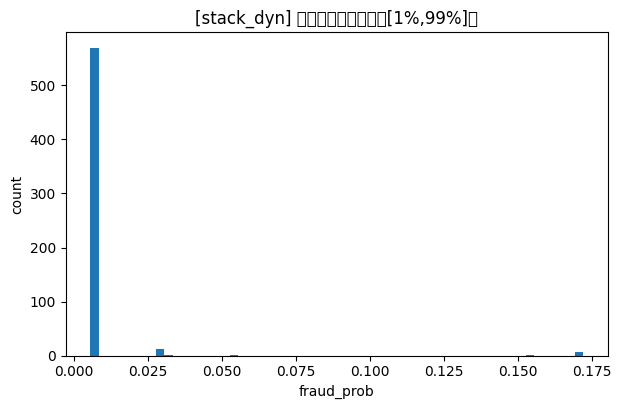

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

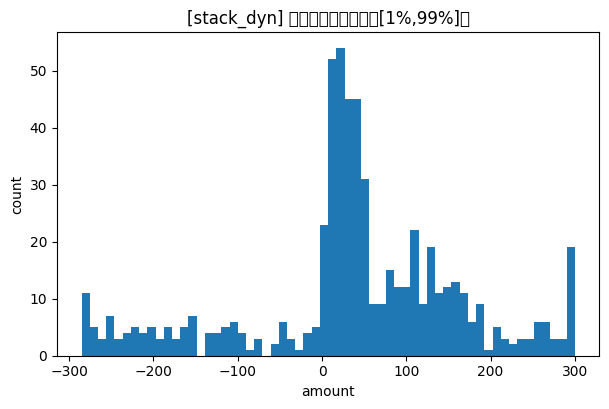

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


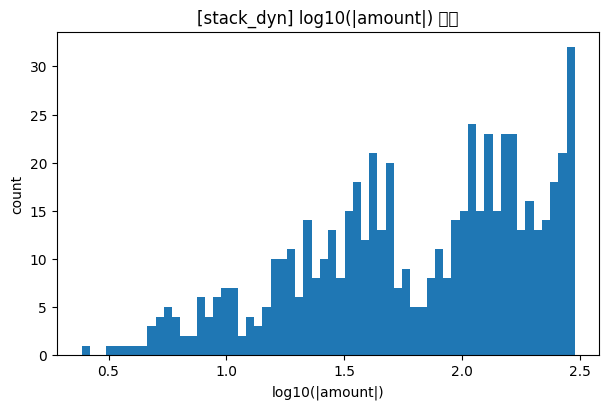


【Top-20 分数最高】
                      transaction_id                           account_id transaction_date  amount  fraud_prob  risk_score
bfb15404-c473-4029-9516-b5f2ffaac5a3 ccf7bcad-a50c-45c0-bb27-32d0f0860935       2024-01-05  299.98    0.837479  100.000000
3fad878f-9a4a-4a6f-94d6-7fe368c0d2d0 cc19466e-c33c-440e-ac7a-fdc25dbf239a       2023-11-15 -293.92    0.338444   99.999194
017506cb-04a7-41da-844c-ada06635afb4 440cd32e-ad0d-4bd3-be5e-9293eed20d70       2025-01-16  299.93    0.338108   99.998387
dbdaa92d-28bc-4d70-ba1d-9261d03d5566 0c573128-3dfe-42c9-8e4f-83e19041d892       2023-10-17  299.99    0.338058   99.997581
42a6692b-6ba3-4fad-85a9-4a4e2130511d 97abe3d9-d568-4100-9145-70145596b21b       2024-06-19  299.92    0.338027   99.996774
66de7987-7cc2-478e-9eae-781dd6825a82 f56715bb-446f-4fb7-9a73-3df0a7cc6b52       2025-06-22  299.98    0.337779   99.995968
2ce6c401-1d6a-4954-bc75-52cedeeb45e0 ae385a9e-69d2-41ee-b473-11097163a1ba       2023-07-24  300.00    0.153846   99.995161
5

In [ ]:
# === 体检 alerts（stack_dyn）: 评分/金额分布 + 可视化 + 导出 ===

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILE = "fraud_alerts_unlabeled_stack_dyn.csv"   # <- 如需改文件名，改这里
ALIAS = "stack_dyn"
TOPN = 20

def analyze_alerts(path, alias="alerts", topn=20):
    # ---- 读取 ----
    if not os.path.exists(path):
        raise FileNotFoundError(f"未找到文件：{path}")
    # 尝试解析日期列
    parse_cols = []
    with open(path, "r", encoding="utf-8") as f:
        header = f.readline().strip().split(",")
    if "transaction_date" in header:
        parse_cols.append("transaction_date")

    df = pd.read_csv(path, parse_dates=parse_cols, encoding="utf-8")
    print(f"[{alias}] 载入 {len(df):,} 行 | 列：{list(df.columns)}")

    assert "amount" in df.columns, "文件缺少 amount 列"
    # 选择评分列（按优先级就近取）
    score_candidates = ['fraud_prob','p_final','p_ens','p_meta','p_lgbm','p_lstm','p_if','p_tfm']
    score_col = next((c for c in score_candidates if c in df.columns), None)
    if score_col is None:
        raise ValueError(f"未找到评分列（期望其中之一：{score_candidates}）")
    score = df[score_col].astype(float)

    # 风险分（0-100，分位数）：若已有 risk_score 列，以现有为准
    if "risk_score" in df.columns:
        risk_score = df["risk_score"].astype(float).values
    else:
        risk_score = pd.Series(score).rank(method='average', pct=True).values * 100.0
        df["risk_score"] = risk_score

    # ---- 评分分布 ----
    qs = [0, 50, 90, 95, 99, 99.9, 100]
    qvals = np.percentile(score, qs)
    print("\n【评分分布分位数】")
    for q, v in zip(qs, qvals):
        print(f"p{q:>5}: {v:.6f}")

    # ---- 金额统计与分位数 ----
    amt = df['amount'].astype(float)
    print("\n【金额描述性统计】")
    print(amt.describe(percentiles=[.01,.05,.10,.25,.5,.75,.90,.95,.99]).to_string())

    q_list = [0, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 1.0]
    q_vals = np.percentile(amt, [q*100 for q in q_list])
    q_tbl = pd.DataFrame({"quantile": q_list, "amount": q_vals})
    print("\n【金额细分位数】")
    print(q_tbl.to_string(index=False, float_format=lambda x: f"{x:,.4f}"))

    pos_share = float((amt > 0).mean()); neg_share = float((amt < 0).mean()); zero_share = float((amt == 0).mean())
    print(f"\n【金额符号占比】正数: {pos_share:.2%} | 负数: {neg_share:.2%} | 0: {zero_share:.2%}")

    # ---- 可视化 ----
    # 1) 评分直方图（裁剪 1%-99% 便于观测）
    sc_lo, sc_hi = np.percentile(score, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(score, sc_lo, sc_hi), bins=60)
    plt.title(f"[{alias}] 分数直方图（裁剪到[1%,99%]）")
    plt.xlabel(score_col); plt.ylabel("count")
    plt.show()

    # 2) 金额直方图（裁剪 1%-99%）
    lo, hi = np.percentile(amt, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(amt, lo, hi), bins=60)
    plt.title(f"[{alias}] 金额直方图（裁剪到[1%,99%]）")
    plt.xlabel("amount"); plt.ylabel("count")
    plt.show()

    # 3) log10(|amount|) 直方图（去掉 0）
    nz = amt[amt != 0]
    if len(nz) > 0:
        log_abs_amt = np.log10(np.abs(nz))
        plt.figure(figsize=(7,4.2))
        plt.hist(log_abs_amt, bins=60)
        plt.title(f"[{alias}] log10(|amount|) 分布")
        plt.xlabel("log10(|amount|)"); plt.ylabel("count")
        plt.show()

    # ---- TopN：按分数、按绝对金额 ----
    cols_show = [c for c in ['transaction_id','account_id','transaction_date','amount',score_col,'risk_score'] if c in df.columns]
    print(f"\n【Top-{topn} 分数最高】")
    print(df.sort_values([score_col,'transaction_date'], ascending=[False, True])[cols_show].head(topn).to_string(index=False))

    print(f"\n【Top-{topn} 绝对金额最大】")
    print(df.reindex(np.abs(df['amount']).sort_values(ascending=False).index)[cols_show].head(topn).to_string(index=False))

    # ---- 分组概览（可选） ----
    if 'account_id' in df.columns:
        vc = df['account_id'].value_counts().head(10)
        print("\n【Top-10 账户 告警次数】")
        print(vc.to_string())

    # ---- 导出富集结果 ----
    out_dir = Path("./artifacts"); out_dir.mkdir(parents=True, exist_ok=True)
    stem = re.sub(r'\.csv$', '', os.path.basename(path))
    df.to_csv(out_dir / f"{stem}__enriched.csv", index=False, encoding="utf-8")
    q_tbl.to_csv(out_dir / f"{stem}__amount_quantiles.csv", index=False, encoding="utf-8")
    print(f"\n已导出：{out_dir/(stem+'__enriched.csv')} 与 {out_dir/(stem+'__amount_quantiles.csv')}")

analyze_alerts(FILE, alias=ALIAS, topn=TOPN)


[stack_plus_dyn] 载入 601 行 | 列：['transaction_id', 'account_id', 'transaction_date', 'amount', 'fraud_prob', 'risk_score']

【评分分布分位数】
p    0: 0.011358
p   50: 0.021000
p   90: 0.059337
p   95: 0.060503
p   99: 0.174623
p 99.9: 0.759551
p  100: 0.816830

【金额描述性统计】
count    601.000000
mean     146.751647
std      176.231520
min     -299.680000
1%      -295.070000
5%      -278.920000
10%     -228.410000
25%       38.670000
50%      229.840000
75%      284.350000
90%      295.500000
95%      298.430000
99%      299.970000
max      300.000000

【金额细分位数】
 quantile    amount
   0.0000 -299.6800
   0.0010 -299.1880
   0.0100 -295.0700
   0.0500 -278.9200
   0.1000 -228.4100
   0.2500   38.6700
   0.5000  229.8400
   0.7500  284.3500
   0.9000  295.5000
   0.9500  298.4300
   0.9900  299.9700
   0.9990  299.9940
   1.0000  300.0000

【金额符号占比】正数: 89.02% | 负数: 10.98% | 0: 0.00%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

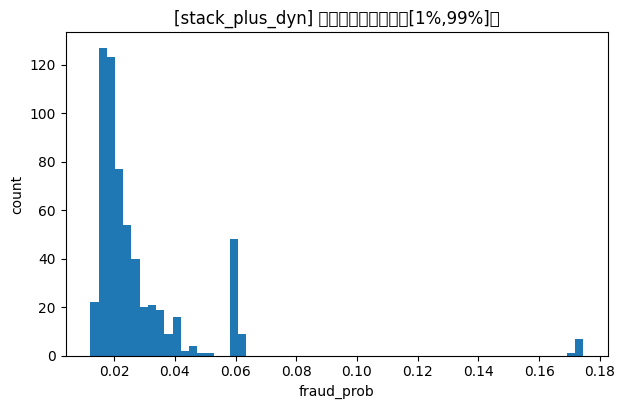

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

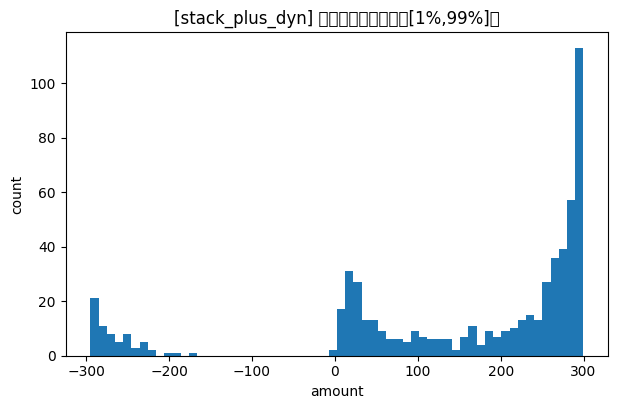

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


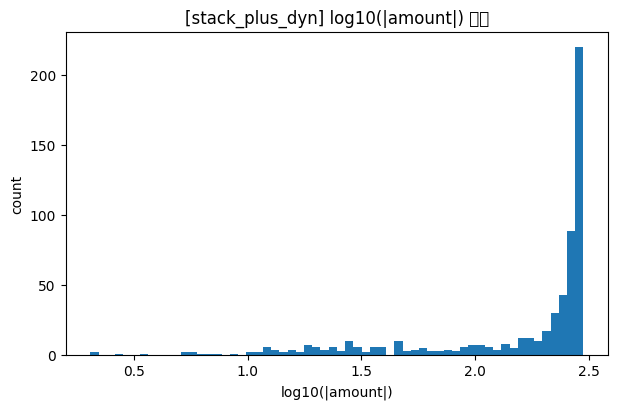


【Top-20 分数最高】
                      transaction_id                           account_id transaction_date  amount  fraud_prob  risk_score
bfb15404-c473-4029-9516-b5f2ffaac5a3 ccf7bcad-a50c-45c0-bb27-32d0f0860935       2024-01-05  299.98    0.816830  100.000000
3fad878f-9a4a-4a6f-94d6-7fe368c0d2d0 cc19466e-c33c-440e-ac7a-fdc25dbf239a       2023-11-15 -293.92    0.721366   99.999194
2ce6c401-1d6a-4954-bc75-52cedeeb45e0 ae385a9e-69d2-41ee-b473-11097163a1ba       2023-07-24  300.00    0.481842   99.998387
66de7987-7cc2-478e-9eae-781dd6825a82 f56715bb-446f-4fb7-9a73-3df0a7cc6b52       2025-06-22  299.98    0.203393   99.997581
f2e19581-0a33-4501-81c4-e0da331bd8af c1aa5a5b-cd7f-49c1-b3e6-57f23725ad21       2025-03-15 -292.80    0.190778   99.996774
017506cb-04a7-41da-844c-ada06635afb4 440cd32e-ad0d-4bd3-be5e-9293eed20d70       2025-01-16  299.93    0.185913   99.995968
42a6692b-6ba3-4fad-85a9-4a4e2130511d 97abe3d9-d568-4100-9145-70145596b21b       2024-06-19  299.92    0.174623   99.995161
d

In [ ]:
# === 体检 alerts（stack_plus_dyn）: 评分/金额分布 + 可视化 + 导出 ===

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILE = "fraud_alerts_unlabeled_stack_plus_dyn.csv"  # <- 如需改文件名，改这里
ALIAS = "stack_plus_dyn"
TOPN = 20

def analyze_alerts(path, alias="alerts", topn=20):
    if not os.path.exists(path):
        raise FileNotFoundError(f"未找到文件：{path}")
    parse_cols = []
    with open(path, "r", encoding="utf-8") as f:
        header = f.readline().strip().split(",")
    if "transaction_date" in header:
        parse_cols.append("transaction_date")

    df = pd.read_csv(path, parse_dates=parse_cols, encoding="utf-8")
    print(f"[{alias}] 载入 {len(df):,} 行 | 列：{list(df.columns)}")
    assert "amount" in df.columns, "文件缺少 amount 列"

    score_candidates = ['fraud_prob','p_final','p_ens','p_meta','p_lgbm','p_lstm','p_if','p_tfm']
    score_col = next((c for c in score_candidates if c in df.columns), None)
    if score_col is None:
        raise ValueError(f"未找到评分列（期望其中之一：{score_candidates}）")
    score = df[score_col].astype(float)

    if "risk_score" in df.columns:
        risk_score = df["risk_score"].astype(float).values
    else:
        risk_score = pd.Series(score).rank(method='average', pct=True).values * 100.0
        df["risk_score"] = risk_score

    # 评分分位
    qs = [0, 50, 90, 95, 99, 99.9, 100]
    qvals = np.percentile(score, qs)
    print("\n【评分分布分位数】")
    for q, v in zip(qs, qvals):
        print(f"p{q:>5}: {v:.6f}")

    # 金额统计
    amt = df['amount'].astype(float)
    print("\n【金额描述性统计】")
    print(amt.describe(percentiles=[.01,.05,.10,.25,.5,.75,.90,.95,.99]).to_string())

    q_list = [0, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 1.0]
    q_vals = np.percentile(amt, [q*100 for q in q_list])
    q_tbl = pd.DataFrame({"quantile": q_list, "amount": q_vals})
    print("\n【金额细分位数】")
    print(q_tbl.to_string(index=False, float_format=lambda x: f"{x:,.4f}"))

    pos_share = float((amt > 0).mean()); neg_share = float((amt < 0).mean()); zero_share = float((amt == 0).mean())
    print(f"\n【金额符号占比】正数: {pos_share:.2%} | 负数: {neg_share:.2%} | 0: {zero_share:.2%}")

    # 图 1：评分直方图（裁剪）
    sc_lo, sc_hi = np.percentile(score, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(score, sc_lo, sc_hi), bins=60)
    plt.title(f"[{alias}] 分数直方图（裁剪到[1%,99%]）")
    plt.xlabel(score_col); plt.ylabel("count")
    plt.show()

    # 图 2：金额直方图（裁剪）
    lo, hi = np.percentile(amt, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(amt, lo, hi), bins=60)
    plt.title(f"[{alias}] 金额直方图（裁剪到[1%,99%]）")
    plt.xlabel("amount"); plt.ylabel("count")
    plt.show()

    # 图 3：log10(|amount|)
    nz = amt[amt != 0]
    if len(nz) > 0:
        log_abs_amt = np.log10(np.abs(nz))
        plt.figure(figsize=(7,4.2))
        plt.hist(log_abs_amt, bins=60)
        plt.title(f"[{alias}] log10(|amount|) 分布")
        plt.xlabel("log10(|amount|)"); plt.ylabel("count")
        plt.show()

    # TopN：分数 & 绝对金额
    cols_show = [c for c in ['transaction_id','account_id','transaction_date','amount',score_col,'risk_score'] if c in df.columns]
    print(f"\n【Top-{topn} 分数最高】")
    print(df.sort_values([score_col,'transaction_date'], ascending=[False, True])[cols_show].head(topn).to_string(index=False))

    print(f"\n【Top-{topn} 绝对金额最大】")
    print(df.reindex(np.abs(df['amount']).sort_values(ascending=False).index)[cols_show].head(topn).to_string(index=False))

    if 'account_id' in df.columns:
        vc = df['account_id'].value_counts().head(10)
        print("\n【Top-10 账户 告警次数】")
        print(vc.to_string())

    # 导出
    out_dir = Path("./artifacts"); out_dir.mkdir(parents=True, exist_ok=True)
    stem = re.sub(r'\.csv$', '', os.path.basename(path))
    df.to_csv(out_dir / f"{stem}__enriched.csv", index=False, encoding="utf-8")
    q_tbl.to_csv(out_dir / f"{stem}__amount_quantiles.csv", index=False, encoding="utf-8")
    print(f"\n已导出：{out_dir/(stem+'__enriched.csv')} 与 {out_dir/(stem+'__amount_quantiles.csv')}")

analyze_alerts(FILE, alias=ALIAS, topn=TOPN)


In [ ]:
# =========================
# 8) 统一推理：多模型集成（LGBM+LSTM+TFM+IF，按可用情况自动降级）
#    阈值：默认“动态分位点迁移+金额正负分组”；如存在 BetaCalib+先验工件，则自动启用固定成本阈值
# =========================
import os, json, joblib, numpy as np, pandas as pd, torch
from pathlib import Path

# —— 可调参数 —— #
NEG_Q_SHIFT = 0.001   # 对负金额更保守的分位偏移（0~0.005）
MIN_ABS_AMT = 0.0     # 最小绝对金额护栏；0 表示关闭
BS = 512              # 批大小（序列模型）

# 安全的设备选择
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 读无标签数据
df_u = pd.read_csv(UNLABELED, parse_dates=['transaction_date']).sort_values('transaction_date').reset_index(drop=True)
assert {'transaction_id','account_id','transaction_date','amount'}.issubset(df_u.columns), "unlabeled文件缺少必要列"

# === 载入训练配置&工件 ===
with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
    cfg = json.load(f)
SEQ_LEN   = cfg["seq_len"]
SEQ_FEATS = cfg["seq_feats"]
TAB_FEATS_CFG = cfg.get("tab_feats", None)     # 有则用之，无则稍后自动推
THR_META  = cfg.get("threshold_meta", 0.999)   # 旧方案里保存的阈值，分位迁移会用到
gmn, gmx  = cfg["global_min"], cfg["global_max"]

# config_meta（如存在，则包含 seq/noseq 两套阈值）
THR_META_SEQ, THR_META_NOSEQ = None, None
cfg_meta_path = ARTIFACT/"config_meta.json"
if cfg_meta_path.exists():
    with open(cfg_meta_path, "r", encoding="utf-8") as f:
        cfgm = json.load(f)
        THR_META_SEQ   = cfgm.get("thr_meta_seq", None)
        THR_META_NOSEQ = cfgm.get("thr_meta_noseq", None)

# 缩放器/账户统计
scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
seq_scaler = joblib.load(ARTIFACT/"seq_scaler.joblib")
acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
if 'account_id' in acct_stats.columns:
    acct_stats = acct_stats.set_index('account_id')

# === 特征（无标签） ===
tab_u, _ = make_tabular_features(df_u, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
tab_u[SEQ_FEATS] = seq_scaler.transform(tab_u[SEQ_FEATS])

# tab 特征列
if TAB_FEATS_CFG is not None:
    tab_cols = TAB_FEATS_CFG
else:
    tab_cols = [c for c in tab_u.columns if c not in ['transaction_id','account_id','transaction_date','amount']]

# === 各基模型概率（按可用情况加载） ===
# 1) LGBM（必需）
lgbm_cal = joblib.load(ARTIFACT/"lgbm_calibrated.pkl")
p_u_lgbm = lgbm_cal.predict_proba(tab_u[tab_cols])[:,1]

# 2) IF（可选）
p_u_if = None
if (ARTIFACT/"iforest.pkl").exists() and (ARTIFACT/"platt_if.joblib").exists():
    iforest  = joblib.load(ARTIFACT/"iforest.pkl")
    platt_if = joblib.load(ARTIFACT/"platt_if.joblib")
    s_u_if   = -iforest.score_samples(tab_u[tab_cols].values)
    p_u_if   = platt_if.predict_proba(s_u_if.reshape(-1,1))[:,1]

# 3) 序列：LSTM（可选，但推荐）
p_u_lstm, idx_u_seq = None, np.array([], dtype=int)
if (ARTIFACT/"lstm_seq.pt").exists() and (ARTIFACT/"lstm_platt.joblib").exists():
    X_u_seq, _, idx_u_seq = make_sequences(tab_u, SEQ_FEATS, SEQ_LEN, y=None)
    lstm = LSTMCls(n_feat=len(SEQ_FEATS), hdim=64).to(device)
    lstm.load_state_dict(torch.load(ARTIFACT/"lstm_seq.pt", map_location=device))
    lstm.eval()
    platt_lstm = joblib.load(ARTIFACT/"lstm_platt.joblib")
    logits = []
    with torch.no_grad():
        for i in range(0, len(X_u_seq), BS):
            xb = torch.from_numpy(X_u_seq[i:i+BS]).float().to(device)
            logits.extend(lstm(xb).cpu().numpy().ravel())
    p_u_lstm = platt_lstm.predict_proba(np.array(logits).reshape(-1,1))[:,1]

# 4) 序列：Transformer（可选）
p_u_tfm = None
if (ARTIFACT/"transformer_seq.pt").exists() and (ARTIFACT/"platt_tfm.joblib").exists():
    X_u_seq2 = X_u_seq if len(idx_u_seq)>0 else make_sequences(tab_u, SEQ_FEATS, SEQ_LEN, y=None)[0]
    tfm = TransformerCls(n_feat=len(SEQ_FEATS)).to(device)
    tfm.load_state_dict(torch.load(ARTIFACT/"transformer_seq.pt", map_location=device))
    tfm.eval()
    platt_tf = joblib.load(ARTIFACT/"platt_tfm.joblib")
    logits2 = []
    with torch.no_grad():
        for i in range(0, len(X_u_seq2), BS):
            xb = torch.from_numpy(X_u_seq2[i:i+BS]).float().to(device)
            logits2.extend(tfm(xb).cpu().numpy().ravel())
    p_u_tfm = platt_tf.predict_proba(np.array(logits2).reshape(-1,1))[:,1]
    # 若 LSTM 没有，而 Transformer 有，则补 idx_u_seq
    if len(idx_u_seq)==0:
        idx_u_seq = make_sequences(tab_u, SEQ_FEATS, SEQ_LEN, y=None)[2]

# 索引对齐到整表
pos_in_u = tab_u.index.get_indexer(idx_u_seq) if len(idx_u_seq)>0 else np.array([], dtype=int)
valid_pos = (pos_in_u >= 0)

# === 融合：优先使用已训练好的 meta；否则等权投票 ===
p_meta_noseq = None
p_meta_seq   = None

# 组装 noseq 特征
noseq_feats = [p_u_lgbm]
if p_u_if is not None: noseq_feats.append(p_u_if)

# 组装 seq 特征（只对 valid_pos 子集）
seq_feats_aligned = []
if len(idx_u_seq)>0 and valid_pos.any():
    # 注意：每个序列模型的概率都只在 valid_pos 子集上取值
    seq_base = [p_u_lgbm[pos_in_u[valid_pos]]]
    if p_u_lstm is not None: seq_base.append(p_u_lstm[valid_pos])
    if p_u_tfm  is not None: seq_base.append(p_u_tfm[valid_pos])
    if p_u_if   is not None: seq_base.append(p_u_if[pos_in_u[valid_pos]])
    seq_feats_aligned = seq_base

# 先尝试用 meta
meta_seq_path, meta_noseq_path = ARTIFACT/"meta_seq.pkl", ARTIFACT/"meta_noseq.pkl"
if meta_noseq_path.exists():
    meta_noseq = joblib.load(meta_noseq_path)
    X_noseq = np.c_[*noseq_feats] if len(noseq_feats)>1 else np.array(noseq_feats[0]).reshape(-1,1)
    p_meta_noseq = meta_noseq.predict_proba(X_noseq)[:,1]
else:
    # 等权
    p_meta_noseq = np.mean(np.c_[*noseq_feats], axis=1)

if len(seq_feats_aligned)>0:
    if meta_seq_path.exists():
        meta_seq = joblib.load(meta_seq_path)
        X_seq = np.c_[*seq_feats_aligned] if len(seq_feats_aligned)>1 else np.array(seq_feats_aligned[0]).reshape(-1,1)
        p_meta_seq = meta_seq.predict_proba(X_seq)[:,1]
    else:
        p_meta_seq = np.mean(np.c_[*seq_feats_aligned], axis=1)

# 汇总到整表：默认 p_final = p_meta_noseq；对 valid_pos 位置用 p_meta_seq 覆盖
p_final = np.array(p_meta_noseq, dtype=float)
if (p_meta_seq is not None) and valid_pos.any():
    p_final[pos_in_u[valid_pos]] = p_meta_seq

# =============== 阈值判定策略 ===============
# 路线 A（如可用优先）：Beta-Calib + 先验修正 + 固定成本阈值
# 路线 B（默认）：分位点迁移 + 金额正负分组

def percentile_rank(arr, v):
    return float((arr <= v).mean()) if len(arr)>0 else 1.0

def recompute_val_probs_for_thresholds():
    """复算验证集融合概率（与训练相同 80/20 时间切分），用于分位点迁移"""
    df_lbl = pd.read_csv(LABELED, parse_dates=['transaction_date']).sort_values('transaction_date').reset_index(drop=True)
    split = int(len(df_lbl)*0.8)
    va_df  = df_lbl.iloc[split:].copy()
    tab_va2, _ = make_tabular_features(va_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
    tab_va2[SEQ_FEATS] = seq_scaler.transform(tab_va2[SEQ_FEATS])
    # 各模型概率
    p_va_lgbm2 = lgbm_cal.predict_proba(tab_va2[tab_cols])[:,1]
    p_va_if2 = None
    if p_u_if is not None:
        s_va_if2 = -iforest.score_samples(tab_va2[tab_cols].values)
        p_va_if2 = platt_if.predict_proba(s_va_if2.reshape(-1,1))[:,1]
    # 序列
    X_va_seq2, y_va_seq2, idx_va_seq2 = make_sequences(tab_va2, SEQ_FEATS, SEQ_LEN, y=va_df['is_fraud'].astype(int))
    pos_in_va2 = tab_va2.index.get_indexer(idx_va_seq2)
    valid_va   = (pos_in_va2 >= 0)

    # noseq
    feats_noseq_val = [p_va_lgbm2]
    if p_va_if2 is not None: feats_noseq_val.append(p_va_if2)
    if meta_noseq_path.exists():
        meta_noseq = joblib.load(meta_noseq_path)
        Xn = np.c_[*feats_noseq_val] if len(feats_noseq_val)>1 else np.array(feats_noseq_val[0]).reshape(-1,1)
        p_meta_noseq_va = meta_noseq.predict_proba(Xn)[:,1]
    else:
        p_meta_noseq_va = np.mean(np.c_[*feats_noseq_val], axis=1)

    # seq（只在 valid_va 上）
    p_meta_seq_va = None
    if len(X_va_seq2)>0 and valid_va.any():
        feats_seq_val = [p_va_lgbm2[pos_in_va2[valid_va]]]
        if (ARTIFACT/"lstm_seq.pt").exists() and (ARTIFACT/"lstm_platt.joblib").exists():
            # 复算 LSTM 验证概率
            lstm = LSTMCls(n_feat=len(SEQ_FEATS), hdim=64).to(device)
            lstm.load_state_dict(torch.load(ARTIFACT/"lstm_seq.pt", map_location=device)); lstm.eval()
            platt_lstm = joblib.load(ARTIFACT/"lstm_platt.joblib")
            logits_va_lstm2=[]
            with torch.no_grad():
                for i in range(0, len(X_va_seq2), BS):
                    xb = torch.from_numpy(X_va_seq2[i:i+BS]).float().to(device)
                    logits_va_lstm2.extend(lstm(xb).cpu().numpy().ravel())
            feats_seq_val.append(platt_lstm.predict_proba(np.array(logits_va_lstm2).reshape(-1,1))[:,1])
        if (ARTIFACT/"transformer_seq.pt").exists() and (ARTIFACT/"platt_tfm.joblib").exists():
            tfm = TransformerCls(n_feat=len(SEQ_FEATS)).to(device)
            tfm.load_state_dict(torch.load(ARTIFACT/"transformer_seq.pt", map_location=device)); tfm.eval()
            platt_tf = joblib.load(ARTIFACT/"platt_tfm.joblib")
            logits_va_tfm2=[]
            with torch.no_grad():
                for i in range(0, len(X_va_seq2), BS):
                    xb = torch.from_numpy(X_va_seq2[i:i+BS]).float().to(device)
                    logits_va_tfm2.extend(tfm(xb).cpu().numpy().ravel())
            feats_seq_val.append(platt_tf.predict_proba(np.array(logits_va_tfm2).reshape(-1,1))[:,1])
        if p_va_if2 is not None:
            feats_seq_val.append(p_va_if2[pos_in_va2[valid_va]])

        if meta_seq_path.exists():
            meta_seq = joblib.load(meta_seq_path)
            Xs = np.c_[*feats_seq_val] if len(feats_seq_val)>1 else np.array(feats_seq_val[0]).reshape(-1,1)
            p_meta_seq_va = meta_seq.predict_proba(Xs)[:,1]
        else:
            p_meta_seq_va = np.mean(np.c_[*feats_seq_val], axis=1)

    return tab_va2, p_meta_noseq_va, p_meta_seq_va

# A) 如存在 BetaCalib + 部署先验配置，优先采用“成本阈值”方案
ART_SR = Path("./artifacts_sr") if (Path("./artifacts_sr")).exists() else ARTIFACT
beta_path = ART_SR/"meta_beta.joblib"
deploy_cfg_path = ART_SR/"deploy_meta_config.json"

use_cost_threshold = beta_path.exists() and deploy_cfg_path.exists()
if use_cost_threshold:
    beta = joblib.load(beta_path)
    with open(deploy_cfg_path, "r", encoding="utf-8") as f:
        depcfg = json.load(f)
    t_star = float(depcfg["bayes_threshold"])
    pi_tr  = float(depcfg["pi_meta_train"])

    # BetaCalib
    def _logit(p, eps=1e-6):
        p = np.clip(p, eps, 1-eps); return np.log(p/(1-p))
    s  = _logit(p_final)
    p_cal = beta.lr.predict_proba(np.c_[_logit(p_final), _logit(p_final)**2])[:,1]

    # 先验漂移修正
    def prior_correct(p, pi_old, pi_new, eps=1e-6):
        r = (pi_new+eps)/(pi_old+eps)
        num = p*r
        den = num + (1-p)*((1-pi_new+eps)/(1-pi_old+eps))
        return num/den
    def estimate_pi_fixedpoint(p_cal, pi_old, iters=20):
        pi = float(np.clip(p_cal.mean(), 1e-6, 0.5))
        for _ in range(iters):
            p_adj = prior_correct(p_cal, pi_old, pi)
            pi = float(np.clip(p_adj.mean(), 1e-6, 0.5))
        return pi
    pi_new = estimate_pi_fixedpoint(p_cal, pi_tr)
    p_adj  = prior_correct(p_cal, pi_tr, pi_new)

    flag = (p_adj >= t_star)
    print(f"[COST] 先验：train={pi_tr:.6f} → deploy={pi_new:.6f}；阈值 t*={t_star:.4f}；报警率={(flag.mean()):.4%}")
    prob_for_export = p_adj

# B) 否则：动态分位点迁移 + 金额正负分组
else:
    tab_va2, p_meta_noseq_va, p_meta_seq_va = recompute_val_probs_for_thresholds()

    # 选择验证阈值（若有 seq/noseq 配置就用，否则回退到 THR_META）
    if THR_META_SEQ is not None and THR_META_NOSEQ is not None:
        q_seq   = percentile_rank(p_meta_seq_va if p_meta_seq_va is not None else np.array([1.0]), THR_META_SEQ)
        q_noseq = percentile_rank(p_meta_noseq_va, THR_META_NOSEQ)
    else:
        q_seq   = percentile_rank(p_meta_seq_va if p_meta_seq_va is not None else np.array([1.0]), THR_META)
        q_noseq = percentile_rank(p_meta_noseq_va, THR_META)

    # 在无标签分布上取相同分位点做动态阈值
    thr_noseq_dyn = np.quantile(p_meta_noseq, q_noseq)
    if (p_meta_seq is not None) and valid_pos.any():
        thr_seq_dyn = np.quantile(p_meta_seq, q_seq)
    else:
        thr_seq_dyn = 1.0

    # 金额正负分组
    # 有序列
    thr_seq_pos, thr_seq_neg = thr_seq_dyn, thr_seq_dyn
    if (p_meta_seq is not None) and valid_pos.any():
        amt_seq = tab_u.loc[idx_u_seq[valid_pos], 'amount'].values
        p_seq_pos = p_meta_seq[amt_seq >= 0]
        p_seq_neg = p_meta_seq[amt_seq <  0]
        if len(p_seq_pos)>0: thr_seq_pos = np.quantile(p_seq_pos, q_seq)
        if len(p_seq_neg)>0: thr_seq_neg = np.quantile(p_seq_neg, min(q_seq+NEG_Q_SHIFT, 0.9999))

    # 无序列
    noseq_pos = p_meta_noseq[ tab_u['amount'] >= 0 ]
    noseq_neg = p_meta_noseq[ tab_u['amount'] <  0 ]
    thr_noseq_pos = np.quantile(noseq_pos, q_noseq) if len(noseq_pos)>0 else thr_noseq_dyn
    thr_noseq_neg = np.quantile(noseq_neg, min(q_noseq+NEG_Q_SHIFT,0.9999)) if len(noseq_neg)>0 else thr_noseq_dyn

    print("Unlabeled prob quantiles:",
          {q: float(np.percentile(np.r_[p_meta_noseq, (p_meta_seq if p_meta_seq is not None else [])], q)) for q in [50,90,95,99,99.9,100]})
    print(f"[分位迁移] q_seq={q_seq:.6f} q_noseq={q_noseq:.6f} → "
          f"seq_pos={thr_seq_pos:.6f} seq_neg={thr_seq_neg:.6f} | "
          f"noseq_pos={thr_noseq_pos:.6f} noseq_neg={thr_noseq_neg:.6f}")

    # 判定
    flag = np.zeros(len(tab_u), dtype=bool)
    # 无序列
    noseq_mask = np.ones(len(tab_u), dtype=bool)
    if valid_pos.any(): noseq_mask[pos_in_u[valid_pos]] = False
    flag |= (noseq_mask & ( ((tab_u['amount'].values >= 0) & (p_meta_noseq >= thr_noseq_pos)) |
                            ((tab_u['amount'].values <  0) & (p_meta_noseq >= thr_noseq_neg)) ))
    # 有序列
    if (p_meta_seq is not None) and valid_pos.any():
        seq_mask = np.zeros(len(tab_u), dtype=bool)
        seq_mask[pos_in_u[valid_pos]] = True
        # 注意：有序列位置最终概率就是 p_final[pos_in_u]=p_meta_seq
        flag |= (seq_mask & ( ((tab_u['amount'].values >= 0) & (p_final >= thr_seq_pos)) |
                              ((tab_u['amount'].values <  0) & (p_final >= thr_seq_neg)) ))

    prob_for_export = p_final

# —— 业务护栏（最小金额） —— #
if MIN_ABS_AMT > 0:
    flag &= (tab_u['amount'].abs().values >= MIN_ABS_AMT)

# 风险分（0-100）
risk_score = pd.Series(prob_for_export).rank(method='average', pct=True).values * 100.0

# 导出告警
alerts = tab_u.loc[flag, ['transaction_id','account_id','transaction_date','amount']].copy()
alerts['fraud_prob'] = prob_for_export[flag]
alerts['risk_score'] = risk_score[flag]
alerts = alerts.sort_values(['risk_score','fraud_prob','transaction_date'], ascending=[False, False, True])
alerts.to_csv("fraud_alerts_unlabeled_unified.csv", index=False, encoding="utf-8")
print(f"[UNIFIED] 告警：{len(alerts)} → fraud_alerts_unlabeled_unified.csv")

# 全量打分（便于巡检）
out_all = tab_u[['transaction_id','account_id','transaction_date','amount']].copy()
out_all['p_lgbm'] = p_u_lgbm
out_all['p_if']   = p_u_if  if p_u_if   is not None else np.nan
out_all['p_lstm'] = np.nan;  out_all['p_tfm'] = np.nan
if (p_u_lstm is not None) and valid_pos.any():
    out_all.loc[idx_u_seq, 'p_lstm'] = p_u_lstm
if (p_u_tfm  is not None) and valid_pos.any():
    out_all.loc[idx_u_seq, 'p_tfm']  = p_u_tfm
out_all['p_final']    = p_final
out_all['risk_score'] = risk_score
out_all.to_csv("scores_unlabeled_unified.csv", index=False, encoding="utf-8")
print("Scored all rows → scores_unlabeled_unified.csv")


Unlabeled prob quantiles: {50: 0.0034548811954623797, 90: 0.005208636088457929, 95: 0.008416498634125849, 99: 0.025149577286456372, 99.9: 0.05107563879897328, 100: 0.9743577803477592}
[分位迁移] q_seq=0.995124 q_noseq=0.995084 → seq_pos=0.015843 seq_neg=0.059228 | noseq_pos=0.011347 noseq_neg=0.040089
[UNIFIED] 告警：601 → fraud_alerts_unlabeled_unified.csv
Scored all rows → scores_unlabeled_unified.csv


[stack_plus_dyn] 载入 601 行 | 列：['transaction_id', 'account_id', 'transaction_date', 'amount', 'fraud_prob', 'risk_score']

【评分分布分位数】
p    0: 0.011358
p   50: 0.021000
p   90: 0.059337
p   95: 0.060503
p   99: 0.174623
p 99.9: 0.759551
p  100: 0.816830

【金额描述性统计】
count    601.000000
mean     146.751647
std      176.231520
min     -299.680000
1%      -295.070000
5%      -278.920000
10%     -228.410000
25%       38.670000
50%      229.840000
75%      284.350000
90%      295.500000
95%      298.430000
99%      299.970000
max      300.000000

【金额细分位数】
 quantile    amount
   0.0000 -299.6800
   0.0010 -299.1880
   0.0100 -295.0700
   0.0500 -278.9200
   0.1000 -228.4100
   0.2500   38.6700
   0.5000  229.8400
   0.7500  284.3500
   0.9000  295.5000
   0.9500  298.4300
   0.9900  299.9700
   0.9990  299.9940
   1.0000  300.0000

【金额符号占比】正数: 89.02% | 负数: 10.98% | 0: 0.00%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

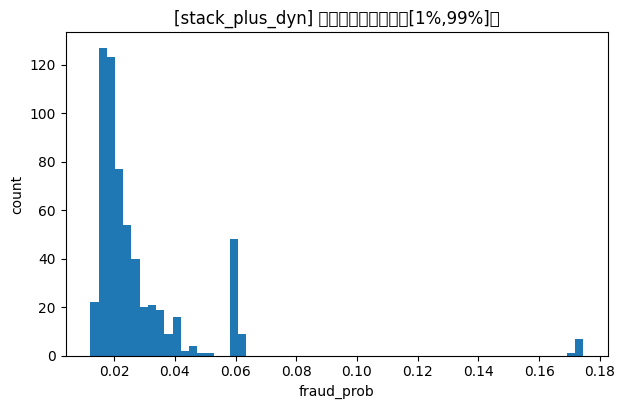

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

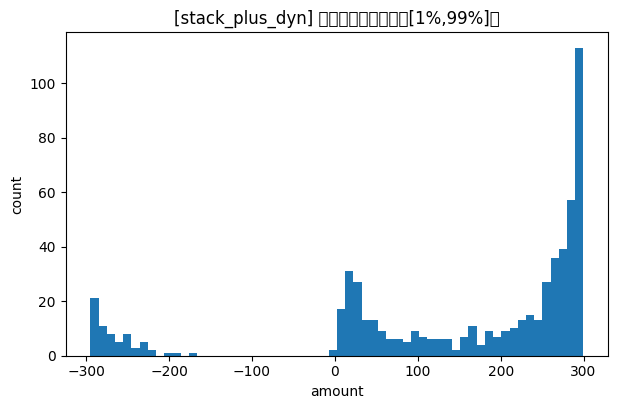

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


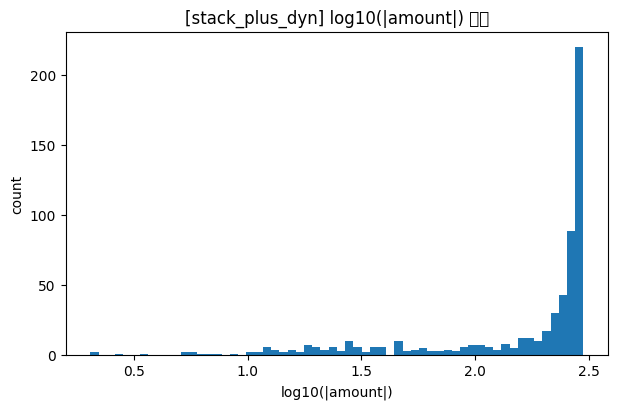


【Top-20 分数最高】
                      transaction_id                           account_id transaction_date  amount  fraud_prob  risk_score
bfb15404-c473-4029-9516-b5f2ffaac5a3 ccf7bcad-a50c-45c0-bb27-32d0f0860935       2024-01-05  299.98    0.816830  100.000000
3fad878f-9a4a-4a6f-94d6-7fe368c0d2d0 cc19466e-c33c-440e-ac7a-fdc25dbf239a       2023-11-15 -293.92    0.721366   99.999194
2ce6c401-1d6a-4954-bc75-52cedeeb45e0 ae385a9e-69d2-41ee-b473-11097163a1ba       2023-07-24  300.00    0.481842   99.998387
66de7987-7cc2-478e-9eae-781dd6825a82 f56715bb-446f-4fb7-9a73-3df0a7cc6b52       2025-06-22  299.98    0.203393   99.997581
f2e19581-0a33-4501-81c4-e0da331bd8af c1aa5a5b-cd7f-49c1-b3e6-57f23725ad21       2025-03-15 -292.80    0.190778   99.996774
017506cb-04a7-41da-844c-ada06635afb4 440cd32e-ad0d-4bd3-be5e-9293eed20d70       2025-01-16  299.93    0.185913   99.995968
42a6692b-6ba3-4fad-85a9-4a4e2130511d 97abe3d9-d568-4100-9145-70145596b21b       2024-06-19  299.92    0.174623   99.995161
d

In [ ]:
# === 体检 alerts（stack_plus_dyn）: 评分/金额分布 + 可视化 + 导出 ===

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILE = "fraud_alerts_unlabeled_unified.csv"  # <- 如需改文件名，改这里
ALIAS = "stack_plus_dyn"
TOPN = 20

def analyze_alerts(path, alias="alerts", topn=20):
    if not os.path.exists(path):
        raise FileNotFoundError(f"未找到文件：{path}")
    parse_cols = []
    with open(path, "r", encoding="utf-8") as f:
        header = f.readline().strip().split(",")
    if "transaction_date" in header:
        parse_cols.append("transaction_date")

    df = pd.read_csv(path, parse_dates=parse_cols, encoding="utf-8")
    print(f"[{alias}] 载入 {len(df):,} 行 | 列：{list(df.columns)}")
    assert "amount" in df.columns, "文件缺少 amount 列"

    score_candidates = ['fraud_prob','p_final','p_ens','p_meta','p_lgbm','p_lstm','p_if','p_tfm']
    score_col = next((c for c in score_candidates if c in df.columns), None)
    if score_col is None:
        raise ValueError(f"未找到评分列（期望其中之一：{score_candidates}）")
    score = df[score_col].astype(float)

    if "risk_score" in df.columns:
        risk_score = df["risk_score"].astype(float).values
    else:
        risk_score = pd.Series(score).rank(method='average', pct=True).values * 100.0
        df["risk_score"] = risk_score

    # 评分分位
    qs = [0, 50, 90, 95, 99, 99.9, 100]
    qvals = np.percentile(score, qs)
    print("\n【评分分布分位数】")
    for q, v in zip(qs, qvals):
        print(f"p{q:>5}: {v:.6f}")

    # 金额统计
    amt = df['amount'].astype(float)
    print("\n【金额描述性统计】")
    print(amt.describe(percentiles=[.01,.05,.10,.25,.5,.75,.90,.95,.99]).to_string())

    q_list = [0, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 1.0]
    q_vals = np.percentile(amt, [q*100 for q in q_list])
    q_tbl = pd.DataFrame({"quantile": q_list, "amount": q_vals})
    print("\n【金额细分位数】")
    print(q_tbl.to_string(index=False, float_format=lambda x: f"{x:,.4f}"))

    pos_share = float((amt > 0).mean()); neg_share = float((amt < 0).mean()); zero_share = float((amt == 0).mean())
    print(f"\n【金额符号占比】正数: {pos_share:.2%} | 负数: {neg_share:.2%} | 0: {zero_share:.2%}")

    # 图 1：评分直方图（裁剪）
    sc_lo, sc_hi = np.percentile(score, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(score, sc_lo, sc_hi), bins=60)
    plt.title(f"[{alias}] 分数直方图（裁剪到[1%,99%]）")
    plt.xlabel(score_col); plt.ylabel("count")
    plt.show()

    # 图 2：金额直方图（裁剪）
    lo, hi = np.percentile(amt, [1, 99])
    plt.figure(figsize=(7,4.2))
    plt.hist(np.clip(amt, lo, hi), bins=60)
    plt.title(f"[{alias}] 金额直方图（裁剪到[1%,99%]）")
    plt.xlabel("amount"); plt.ylabel("count")
    plt.show()

    # 图 3：log10(|amount|)
    nz = amt[amt != 0]
    if len(nz) > 0:
        log_abs_amt = np.log10(np.abs(nz))
        plt.figure(figsize=(7,4.2))
        plt.hist(log_abs_amt, bins=60)
        plt.title(f"[{alias}] log10(|amount|) 分布")
        plt.xlabel("log10(|amount|)"); plt.ylabel("count")
        plt.show()

    # TopN：分数 & 绝对金额
    cols_show = [c for c in ['transaction_id','account_id','transaction_date','amount',score_col,'risk_score'] if c in df.columns]
    print(f"\n【Top-{topn} 分数最高】")
    print(df.sort_values([score_col,'transaction_date'], ascending=[False, True])[cols_show].head(topn).to_string(index=False))

    print(f"\n【Top-{topn} 绝对金额最大】")
    print(df.reindex(np.abs(df['amount']).sort_values(ascending=False).index)[cols_show].head(topn).to_string(index=False))

    if 'account_id' in df.columns:
        vc = df['account_id'].value_counts().head(10)
        print("\n【Top-10 账户 告警次数】")
        print(vc.to_string())

    # 导出
    out_dir = Path("./artifacts"); out_dir.mkdir(parents=True, exist_ok=True)
    stem = re.sub(r'\.csv$', '', os.path.basename(path))
    df.to_csv(out_dir / f"{stem}__enriched.csv", index=False, encoding="utf-8")
    q_tbl.to_csv(out_dir / f"{stem}__amount_quantiles.csv", index=False, encoding="utf-8")
    print(f"\n已导出：{out_dir/(stem+'__enriched.csv')} 与 {out_dir/(stem+'__amount_quantiles.csv')}")

analyze_alerts(FILE, alias=ALIAS, topn=TOPN)


 98%|===================| 4917/5000 [00:52<00:00]       /tmp/ipython-input-1119450174.py:75: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv, X_eval, feature_names=feat_cols_tab, plot_type="bar", show=False)


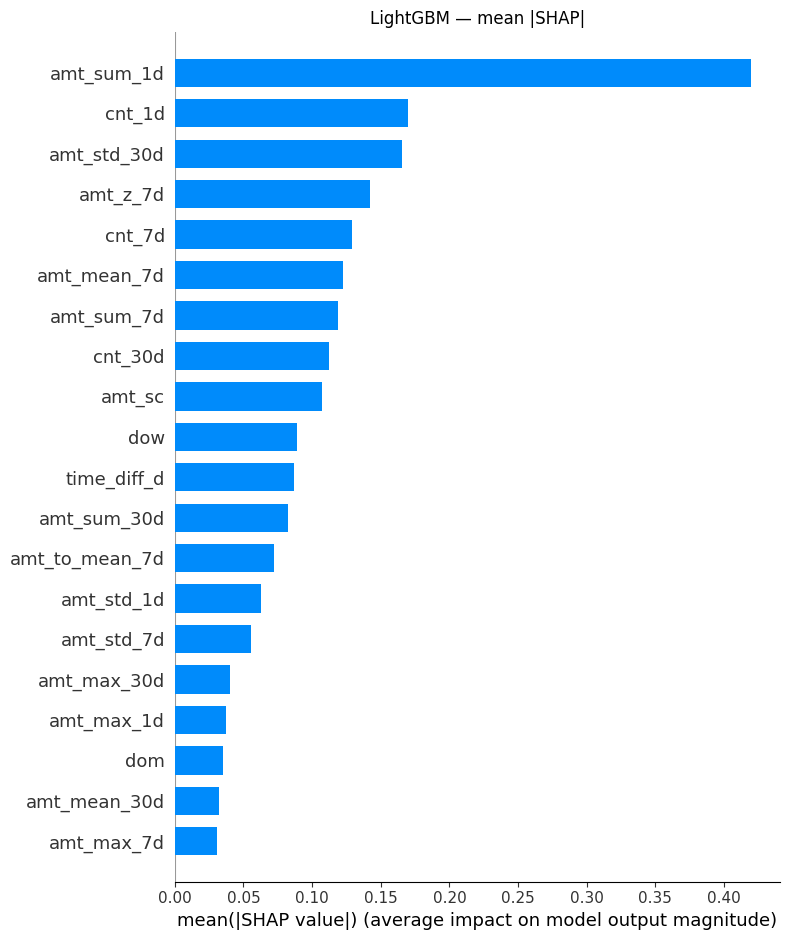

/tmp/ipython-input-1119450174.py:80: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv, X_eval, feature_names=feat_cols_tab, show=True)


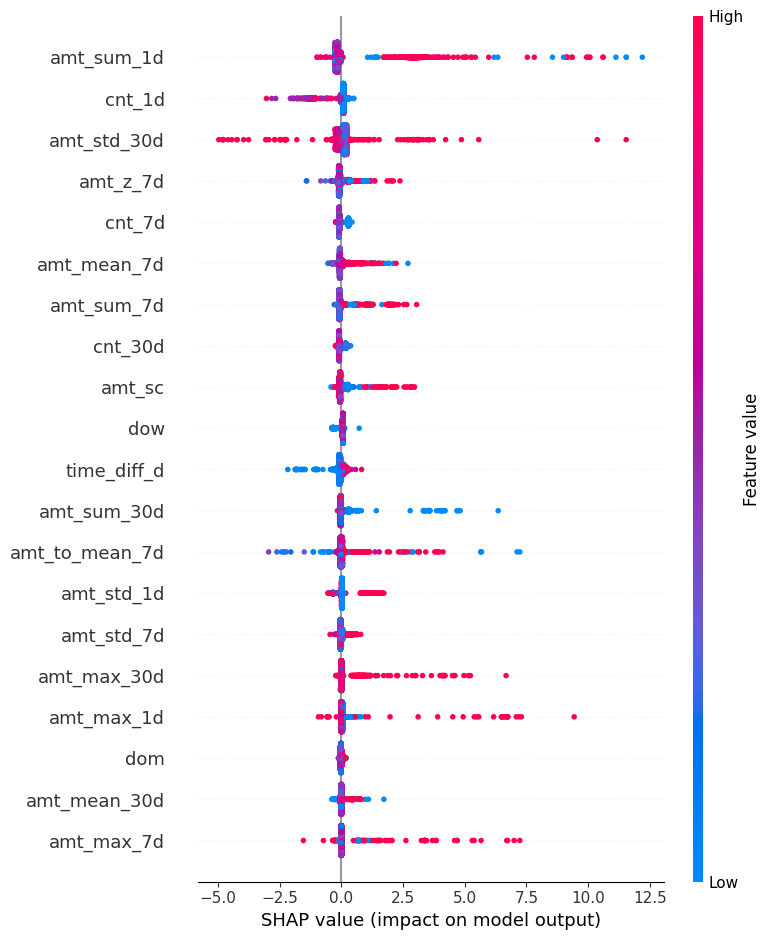

Saved: artifacts/lgbm_shap_importance.csv


In [ ]:
# ==== SHAP for LightGBM (robust to CalibratedClassifierCV wrapping) ====
import numpy as np, pandas as pd, shap, joblib, json, matplotlib.pyplot as plt
from pathlib import Path

# ---- 读取工件 & 准备验证特征（与训练切分一致） ----
with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
    cfg = json.load(f)
gmn, gmx      = cfg["global_min"], cfg["global_max"]
SEQ_FEATS     = cfg["seq_feats"]
tab_feats_cfg = cfg.get("tab_feats", None)

scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
if 'account_id' in acct_stats.columns:
    acct_stats = acct_stats.set_index('account_id')

df_lbl = pd.read_csv(LABELED, parse_dates=['transaction_date']).sort_values('transaction_date').reset_index(drop=True)
split = int(len(df_lbl)*0.8)
va_df  = df_lbl.iloc[split:].copy()

tab_va, _ = make_tabular_features(va_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
feat_cols_tab = tab_feats_cfg or [c for c in tab_va.columns if c not in ['transaction_id','account_id','transaction_date','amount']]
X_va = tab_va[feat_cols_tab].values

# ---- 解包 LightGBM 基模型（兼容不同 sklearn 版本） ----
lgbm_base = None

# 1) 如果你在同一 kernel 里还保留着 lgbm 变量（未校准的 LightGBM），优先用它
try:
    lgbm_base = lgbm
except NameError:
    pass

# 2) 否则从已保存的校准模型里取出基模型
if lgbm_base is None:
    lgbm_cal = joblib.load(ARTIFACT/"lgbm_calibrated.pkl")
    # 新版 sklearn（cv='prefit'）通常有 .estimator
    if hasattr(lgbm_cal, "estimator") and lgbm_cal.estimator is not None:
        lgbm_base = lgbm_cal.estimator
    # 旧版在 .calibrated_classifiers_[0] 里，有时叫 .estimator 或 .base_estimator
    elif hasattr(lgbm_cal, "calibrated_classifiers_") and len(lgbm_cal.calibrated_classifiers_)>0:
        cc0 = lgbm_cal.calibrated_classifiers_[0]
        if hasattr(cc0, "estimator") and cc0.estimator is not None:
            lgbm_base = cc0.estimator
        elif hasattr(cc0, "base_estimator") and cc0.base_estimator is not None:
            lgbm_base = cc0.base_estimator
    if lgbm_base is None:
        raise RuntimeError("无法从 CalibratedClassifierCV 中解包 LightGBM 基模型；请确认已在 ARTIFACT 保存了 lgbm_calibrated.pkl 或在内存中保留了变量 lgbm。")

# ---- 构建 SHAP TreeExplainer（用少量背景样本更稳） ----
rng = np.random.RandomState(42)
bg_n = min(1000, X_va.shape[0])
bg_idx = rng.choice(X_va.shape[0], size=bg_n, replace=False)
X_bg   = X_va[bg_idx]

# LightGBM 的 sklearn 封装可直接交给 TreeExplainer；也可用 lgbm_base.booster_
model_for_shap = getattr(lgbm_base, "booster_", lgbm_base)
explainer = shap.TreeExplainer(model_for_shap, data=X_bg, feature_perturbation="interventional")

# 取一批样本做可视化
eval_n = min(5000, X_va.shape[0])
eval_idx = rng.choice(X_va.shape[0], size=eval_n, replace=False)
X_eval = X_va[eval_idx]

shap_values = explainer.shap_values(X_eval)

# 二分类：shap_values 可能是两个类的列表；取“正类”
if isinstance(shap_values, list) and len(shap_values) == 2:
    sv = shap_values[1]
else:
    sv = np.asarray(shap_values)

# ---- 图 1：Bar（平均|SHAP|） ----
plt.figure(figsize=(8,5))
shap.summary_plot(sv, X_eval, feature_names=feat_cols_tab, plot_type="bar", show=False)
plt.title("LightGBM — mean |SHAP|")
plt.tight_layout(); plt.show()

# ---- 图 2：Beeswarm（全局分布） ----
shap.summary_plot(sv, X_eval, feature_names=feat_cols_tab, show=True)

# ---- 导出特征重要度表 ----
imp = np.abs(sv).mean(axis=0)
imp_tbl = pd.DataFrame({"feature": feat_cols_tab, "mean_abs_shap": imp}).sort_values("mean_abs_shap", ascending=False)
imp_tbl.to_csv(ARTIFACT/"lgbm_shap_importance.csv", index=False, encoding="utf-8")
print("Saved:", ARTIFACT/"lgbm_shap_importance.csv")


In [ ]:
# IF 的 SHAP（KernelExplainer）
iforest = joblib.load(ARTIFACT/"iforest.pkl")
platt_if = joblib.load(ARTIFACT/"platt_if.joblib")

# 取验证集 tab 特征的小样本
tab_cols = cfg.get("tab_feats") or [c for c in tab_va.columns if c not in ['transaction_id','account_id','transaction_date','amount']]
X_va_tab = tab_va[tab_cols].values
rng = np.random.default_rng(42)
idx_bg   = rng.choice(len(X_va_tab), size=min(200, len(X_va_tab)), replace=False)
idx_eval = rng.choice(len(X_va_tab), size=min(500, len(X_va_tab)), replace=False)
X_bg, X_eval = X_va_tab[idx_bg], X_va_tab[idx_eval]

def f_if(x):
    s = -iforest.score_samples(x)  # 越大越异常
    return platt_if.predict_proba(s.reshape(-1,1))[:,1]

expl = shap.KernelExplainer(f_if, X_bg)
sv   = expl.shap_values(X_eval, nsamples=200)
imp  = np.abs(sv).mean(axis=0)
imp_tbl = pd.DataFrame({"feature": tab_cols, "mean_abs_shap": imp}).sort_values("mean_abs_shap", ascending=False)
display(imp_tbl.head(20))


  0%|          | 0/500 [00:00<?, ?it/s]

,feature,mean_abs_shap
6,cnt_1d,0.013628
2,is_weekend,0.012487
12,amt_mean_1d,0.012296
9,amt_sum_1d,0.010714
15,amt_std_1d,0.010551
18,amt_max_1d,0.010487
5,time_diff_d,0.008722
17,amt_std_30d,0.008675
21,amt_to_mean_7d,0.008036
13,amt_mean_7d,0.007380


from matplotlib import pyplot as plt
_df_0['mean_abs_shap'].plot(kind='hist', bins=20, title='mean_abs_shap')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean_abs_shap'].plot(kind='line', figsize=(8, 4), title='mean_abs_shap')
plt.gca().spines[['top', 'right']].set_visible(False)

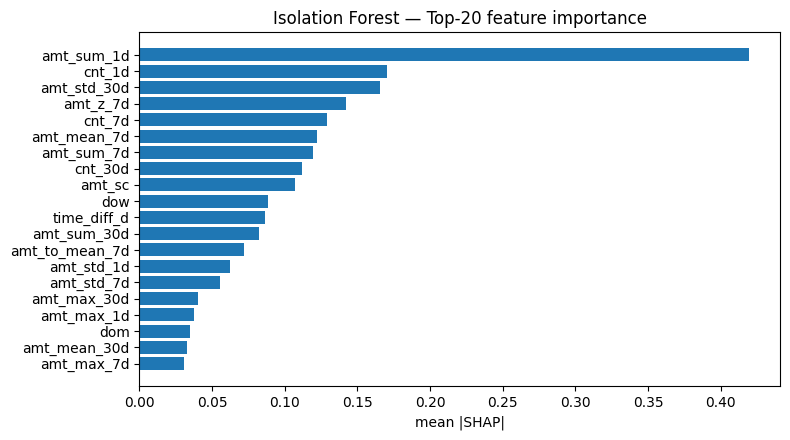

In [ ]:
# 从现有的 imp_df_if 画条形图（无需重新算 SHAP）
tmp = imp_tbl.sort_values("mean_abs_shap", ascending=True).tail(20)
plt.figure(figsize=(8,4.5))
plt.barh(tmp["feature"], tmp["mean_abs_shap"])
plt.xlabel("mean |SHAP|")
plt.title("Isolation Forest — Top-20 feature importance")
plt.tight_layout(); plt.show()

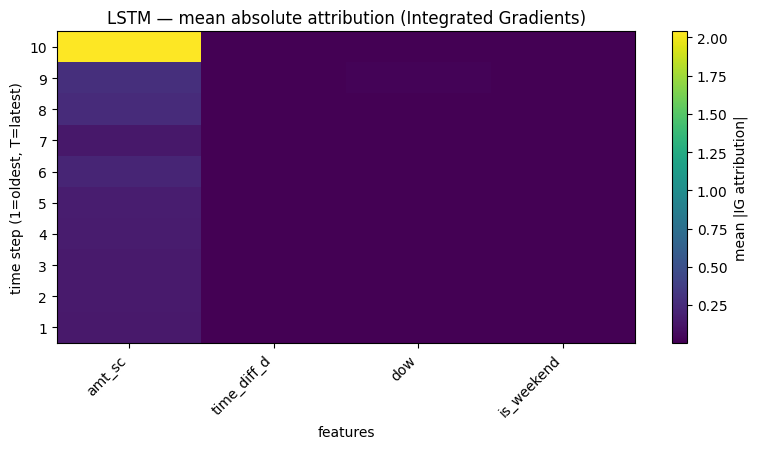

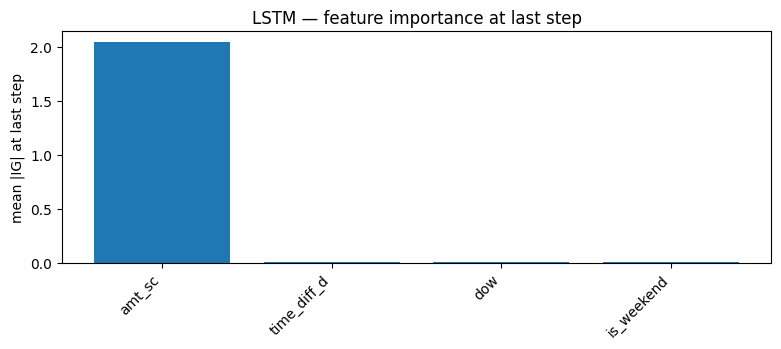

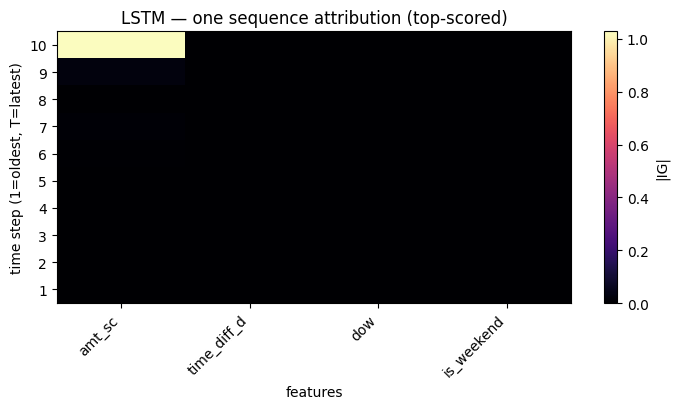

In [ ]:
# === LSTM sequence attribution heatmaps (IG) — robust to cuDNN "backward" error ===
import os, json, numpy as np, pandas as pd, torch, matplotlib.pyplot as plt
from pathlib import Path

try:
    from captum.attr import IntegratedGradients
except Exception:
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", "captum"], check=False)
    from captum.attr import IntegratedGradients

ARTIFACT = Path("./artifacts")

# ---------- ensure we have (model, SEQ_FEATS, X_seq) ----------
def ensure_seq_data():
    g = globals()
    if all(k in g for k in ["lstm", "SEQ_FEATS", "X_va_seq"]):
        model = g["lstm"]
        seq_feats = list(g["SEQ_FEATS"])
        X_seq = g["X_va_seq"].astype(np.float32)
        return model, seq_feats, X_seq, seq_feats

    with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
        cfg = json.load(f)
    seq_len   = cfg["seq_len"]
    seq_feats = cfg["seq_feats"]
    gmn, gmx  = cfg["global_min"], cfg["global_max"]

    import joblib
    scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
    seq_scaler = joblib.load(ARTIFACT/"seq_scaler.joblib")
    acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
    if 'account_id' in acct_stats.columns:
        acct_stats = acct_stats.set_index('account_id')

    try:
        LABELED
    except NameError:
        LABELED = "synthetic_credit_card_transactions_labeled.csv"
    df = pd.read_csv(LABELED, parse_dates=["transaction_date"]).sort_values("transaction_date").reset_index(drop=True)
    split = int(len(df)*0.8)
    val_df = df.iloc[split:].copy()

    tab_va, _ = make_tabular_features(val_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
    tab_va[seq_feats] = seq_scaler.transform(tab_va[seq_feats])
    X_va_seq, y_va_seq, idx_va_seq = make_sequences(tab_va, seq_feats, seq_len, y=val_df['is_fraud'].astype(int))

    class LSTMCls(torch.nn.Module):
        def __init__(self, n_feat, hdim=64):
            super().__init__()
            self.lstm = torch.nn.LSTM(n_feat, hdim, batch_first=True)
            self.fc   = torch.nn.Linear(hdim, 1)
        def forward(self, x):
            _, (h,_) = self.lstm(x)
            return self.fc(h[-1]).squeeze(-1)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMCls(n_feat=len(seq_feats), hdim=64).to(device)
    model.load_state_dict(torch.load(ARTIFACT/"lstm_seq.pt", map_location=device))
    model.eval()
    return model, seq_feats, X_va_seq.astype(np.float32), seq_feats

lstm_model, SEQ_FEATS_USED, X_SEQ_ALL, feat_names = ensure_seq_data()
device = next(lstm_model.parameters()).device

# pick top-K sequences by model score (more informative)
with torch.no_grad():
    logits_all = []
    bs = 512
    for i in range(0, len(X_SEQ_ALL), bs):
        xb = torch.from_numpy(X_SEQ_ALL[i:i+bs]).float().to(device)
        logits_all.append(lstm_model(xb).detach().cpu().numpy())
    logits_all = np.concatenate(logits_all, axis=0)
probs_all = 1/(1+np.exp(-logits_all))
K = min(800, len(X_SEQ_ALL))
top_idx = np.argsort(-probs_all)[:K]
X_eval  = X_SEQ_ALL[top_idx]
probs_eval = probs_all[top_idx]

# ---- IG with robust fallbacks ----
def build_ig(m):  # closure on current device/model
    return IntegratedGradients(lambda x: torch.sigmoid(m(x)).squeeze(-1))

def run_ig_with_fallback(model, inputs_np, n_steps=64):
    import torch.backends.cudnn as cudnn
    was_training = model.training
    cudnn_flag   = cudnn.enabled

    inputs = torch.from_numpy(inputs_np).float().to(next(model.parameters()).device)
    baseline = torch.zeros_like(inputs)

    # attempt 1: train() to allow cuDNN RNN backward
    try:
        model.train()
        torch.set_grad_enabled(True)
        ig = build_ig(model)
        attrs, delta = ig.attribute(inputs, baselines=baseline, n_steps=n_steps, return_convergence_delta=True)
        return attrs.detach().cpu().numpy(), delta.detach().cpu().numpy()
    except RuntimeError as e:
        msg = str(e).lower()
        # attempt 2: disable cuDNN, keep on same device
        if "cudnn rnn backward" in msg or "cudnn" in msg:
            try:
                cudnn.enabled = False
                ig = build_ig(model)
                attrs, delta = ig.attribute(inputs, baselines=baseline, n_steps=n_steps, return_convergence_delta=True)
                return attrs.detach().cpu().numpy(), delta.detach().cpu().numpy()
            except Exception:
                pass
        # attempt 3: CPU fallback
        model_cpu = model.to("cpu").train()
        inputs_cpu   = inputs.detach().cpu()
        baseline_cpu = baseline.detach().cpu()
        ig = build_ig(model_cpu)
        attrs, delta = ig.attribute(inputs_cpu, baselines=baseline_cpu, n_steps=n_steps, return_convergence_delta=True)
        # move model back
        model.to(device)
        return attrs.detach().cpu().numpy(), delta.detach().cpu().numpy()
    finally:
        # restore states
        import torch.backends.cudnn as cudnn
        cudnn.enabled = cudnn_flag
        if not was_training:
            model.eval()

attrs, delta = run_ig_with_fallback(lstm_model, X_eval, n_steps=64)  # [K,T,F]
mean_abs = np.mean(np.abs(attrs), axis=0)  # [T,F]
T, F = mean_abs.shape

# ---- plots (English labels) ----
plt.figure(figsize=(8, 4.6))
im = plt.imshow(np.flipud(mean_abs), aspect='auto', cmap='viridis')
plt.colorbar(im, label='mean |IG attribution|')
plt.xticks(range(F), feat_names, rotation=45, ha='right')
plt.yticks(range(T), [str(t+1) for t in reversed(range(T))])
plt.xlabel('features'); plt.ylabel('time step (1=oldest, T=latest)')
plt.title('LSTM — mean absolute attribution (Integrated Gradients)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8, 3.6))
plt.bar(feat_names, mean_abs[-1])
plt.xticks(rotation=45, ha='right')
plt.ylabel('mean |IG| at last step')
plt.title('LSTM — feature importance at last step')
plt.tight_layout(); plt.show()

one = np.abs(attrs[np.argmax(probs_eval)])
plt.figure(figsize=(7.2, 4.2))
im = plt.imshow(np.flipud(one), aspect='auto', cmap='magma')
plt.colorbar(im, label='|IG|')
plt.xticks(range(F), feat_names, rotation=45, ha='right')
plt.yticks(range(T), [str(t+1) for t in reversed(range(T))])
plt.xlabel('features'); plt.ylabel('time step (1=oldest, T=latest)')
plt.title('LSTM — one sequence attribution (top-scored)')
plt.tight_layout(); plt.show()


IG convergence delta (mean abs): 6.1956e-01
Attribution tensor shape: (800, 10, 4)  | mean_abs shape: (10, 4)


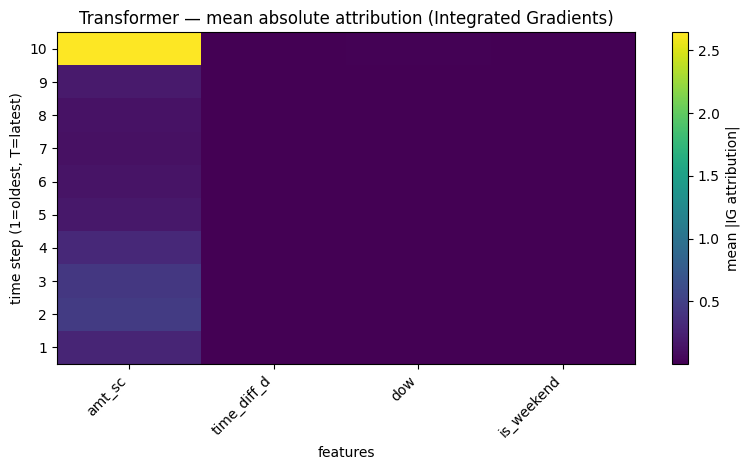

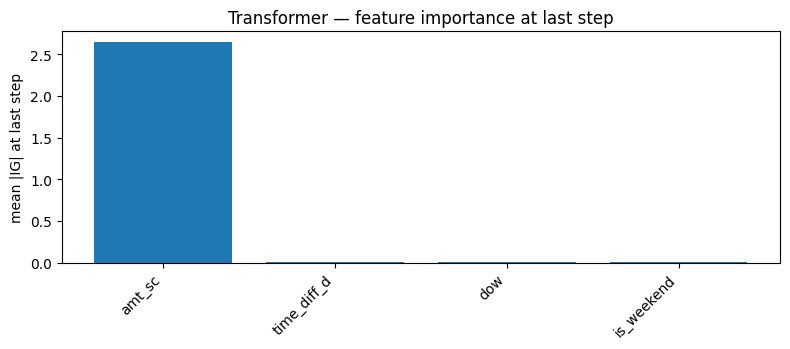

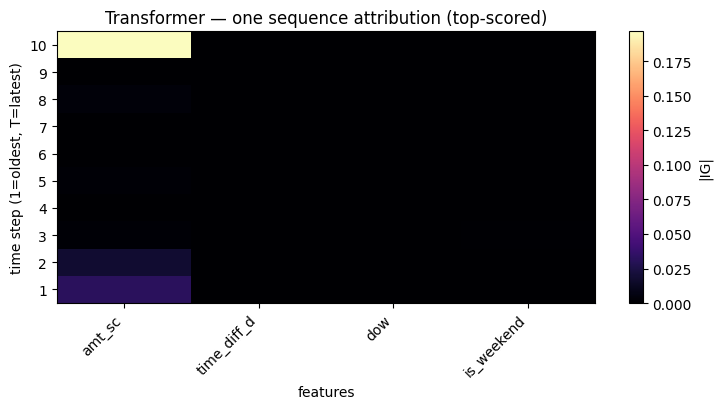

In [ ]:
# === Transformer sequence attribution (Integrated Gradients) ===
import os, json, numpy as np, pandas as pd, torch, matplotlib.pyplot as plt
from pathlib import Path

# Captum (IG)
try:
    from captum.attr import IntegratedGradients
except Exception:
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", "captum"], check=False)
    from captum.attr import IntegratedGradients

ARTIFACT = Path("./artifacts")

# ---------- ensure we have (model, SEQ_FEATS, X_seq) ----------
def ensure_seq_data_for_tfm():
    g = globals()
    if all(k in g for k in ["TransformerCls", "SEQ_FEATS", "X_va_seq"]):
        model = g.get("tfm", None)  # 若你已有 tfm 实例就重用
        seq_feats = list(g["SEQ_FEATS"])
        X_seq = g["X_va_seq"].astype(np.float32)
        if model is None:
            # 定义一个和训练时一致的结构再加载权重
            class TransformerCls(torch.nn.Module):
                def __init__(self, n_feat, d_model=64, nhead=4, num_layers=2, dim_feedforward=128, dropout=0.0):
                    super().__init__()
                    self.proj = torch.nn.Linear(n_feat, d_model)
                    enc_layer = torch.nn.TransformerEncoderLayer(
                        d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
                        dropout=dropout, batch_first=True
                    )
                    self.enc = torch.nn.TransformerEncoder(enc_layer, num_layers=num_layers)
                    self.fc  = torch.nn.Linear(d_model, 1)
                def forward(self, x):
                    h = self.enc(self.proj(x))
                    return self.fc(h[:, -1, :]).squeeze(-1)
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            model = TransformerCls(n_feat=len(seq_feats)).to(device)
            model.load_state_dict(torch.load(ARTIFACT/"transformer_seq.pt", map_location=device))
            model.eval()
        return model, seq_feats, X_seq, seq_feats

    # —— 用 artifacts 重建 —— #
    with open(ARTIFACT/"config.json","r",encoding="utf-8") as f:
        cfg = json.load(f)
    seq_len   = cfg["seq_len"]
    seq_feats = cfg["seq_feats"]
    gmn, gmx  = cfg["global_min"], cfg["global_max"]

    import joblib
    scaler_tab = joblib.load(ARTIFACT/"tab_scaler.joblib")
    seq_scaler = joblib.load(ARTIFACT/"seq_scaler.joblib")
    acct_stats = pd.read_csv(ARTIFACT/"acct_minmax.csv").rename(columns={'min':'mn','max':'mx'})
    if 'account_id' in acct_stats.columns:
        acct_stats = acct_stats.set_index('account_id')

    try:
        LABELED
    except NameError:
        LABELED = "synthetic_credit_card_transactions_labeled.csv"
    df = pd.read_csv(LABELED, parse_dates=["transaction_date"]).sort_values("transaction_date").reset_index(drop=True)
    split = int(len(df)*0.8)
    val_df = df.iloc[split:].copy()

    # 你前面已定义：base_time_features / account_minmax / account_scale / time_window_aggs / make_tabular_features / make_sequences
    tab_va, _ = make_tabular_features(val_df, acct_stats, gmn, gmx, scaler_other=scaler_tab, fit=False)
    tab_va[seq_feats] = seq_scaler.transform(tab_va[seq_feats])
    X_va_seq, y_va_seq, idx_va_seq = make_sequences(tab_va, seq_feats, seq_len, y=val_df['is_fraud'].astype(int))

    class TransformerCls(torch.nn.Module):
        def __init__(self, n_feat, d_model=64, nhead=4, num_layers=2, dim_feedforward=128, dropout=0.0):
            super().__init__()
            self.proj = torch.nn.Linear(n_feat, d_model)
            enc_layer = torch.nn.TransformerEncoderLayer(
                d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
                dropout=dropout, batch_first=True
            )
            self.enc = torch.nn.TransformerEncoder(enc_layer, num_layers=num_layers)
            self.fc  = torch.nn.Linear(d_model, 1)
        def forward(self, x):
            h = self.enc(self.proj(x))
            return self.fc(h[:, -1, :]).squeeze(-1)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = TransformerCls(n_feat=len(seq_feats)).to(device)
    model.load_state_dict(torch.load(ARTIFACT/"transformer_seq.pt", map_location=device))
    model.eval()
    return model, seq_feats, X_va_seq.astype(np.float32), seq_feats

tfm_model, SEQ_FEATS_USED, X_SEQ_ALL, feat_names = ensure_seq_data_for_tfm()
device = next(tfm_model.parameters()).device

# ---------- pick informative sequences (highest scores) ----------
with torch.no_grad():
    logits_all = []
    bs = 512
    for i in range(0, len(X_SEQ_ALL), bs):
        xb = torch.from_numpy(X_SEQ_ALL[i:i+bs]).float().to(device)
        logits_all.append(tfm_model(xb).detach().cpu().numpy())
    logits_all = np.concatenate(logits_all, axis=0)
probs_all = 1/(1+np.exp(-logits_all))
K = min(800, len(X_SEQ_ALL))
top_idx = np.argsort(-probs_all)[:K]
X_eval  = X_SEQ_ALL[top_idx]
probs_eval = probs_all[top_idx]

# ---------- Integrated Gradients ----------
ig = IntegratedGradients(lambda x: torch.sigmoid(tfm_model(x)).squeeze(-1))
inputs   = torch.from_numpy(X_eval).float().to(device)
baseline = torch.zeros_like(inputs)
attrs, delta = ig.attribute(inputs, baselines=baseline, n_steps=64, return_convergence_delta=True)
attrs = attrs.detach().cpu().numpy()          # [K, T, F]
delta = float(delta.detach().cpu().abs().mean())

mean_abs = np.mean(np.abs(attrs), axis=0)     # [T, F]
T, F = mean_abs.shape

print(f"IG convergence delta (mean abs): {delta:.4e}")
print("Attribution tensor shape:", attrs.shape, " | mean_abs shape:", mean_abs.shape)

# ---------- Plots (English) ----------
plt.figure(figsize=(8, 4.8))
im = plt.imshow(np.flipud(mean_abs), aspect='auto', cmap='viridis')
plt.colorbar(im, label='mean |IG attribution|')
plt.xticks(range(F), feat_names, rotation=45, ha='right')
plt.yticks(range(T), [str(t+1) for t in reversed(range(T))])
plt.xlabel('features'); plt.ylabel('time step (1=oldest, T=latest)')
plt.title('Transformer — mean absolute attribution (Integrated Gradients)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8, 3.6))
plt.bar(feat_names, mean_abs[-1])
plt.xticks(rotation=45, ha='right')
plt.ylabel('mean |IG| at last step')
plt.title('Transformer — feature importance at last step')
plt.tight_layout(); plt.show()

one = np.abs(attrs[np.argmax(probs_eval)])
plt.figure(figsize=(7.5, 4.2))
im = plt.imshow(np.flipud(one), aspect='auto', cmap='magma')
plt.colorbar(im, label='|IG|')
plt.xticks(range(F), feat_names, rotation=45, ha='right')
plt.yticks(range(T), [str(t+1) for t in reversed(range(T))])
plt.xlabel('features'); plt.ylabel('time step (1=oldest, T=latest)')
plt.title('Transformer — one sequence attribution (top-scored)')
plt.tight_layout(); plt.show()
